In [1]:
from scipy.stats import bernoulli
import numpy as np
from numpy import random
from matplotlib import pyplot as plt
import scipy.stats as stats
import seaborn as sns
from scipy.stats.stats import pearsonr   
from matplotlib import collections  as mc
from matplotlib.pyplot import figure
from scipy.optimize import minimize
import pandas as pd

## Задача 1

### Пункт A

Посчитаем время в минутах

In [14]:
(20 - 8) * 60

720

Максимальное количество ушедших автобусов это 720 / 5, то есть 144.

In [17]:
720 / 5

144.0

Теперь создаем биномиальное распределение с параметрами $5$ и $10$ с вероятностью 0.5. Далее из array идем до того момента, пока общее количество минут <= 720 => получаем индекс последнего элемента и делаю гистограму

In [835]:
b = np.random.binomial(1, 0.5, size=(10 ** 4, 144)) * 10
b[b == 0] = 5
b

array([[ 5,  5,  5, ..., 10,  5, 10],
       [ 5,  5,  5, ..., 10,  5,  5],
       [10,  5, 10, ...,  5,  5,  5],
       ...,
       [10, 10, 10, ..., 10, 10, 10],
       [10,  5,  5, ..., 10, 10, 10],
       [ 5, 10,  5, ...,  5, 10, 10]])

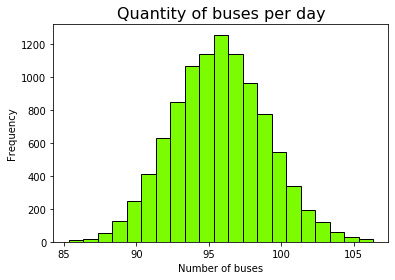

In [1093]:
h = (np.cumsum(b, axis = 1)<=720).argmin(axis = 1)
plt.hist(h, rwidth=1, histtype='bar', color='lawngreen', alpha=1, edgecolor='black', bins=np.arange(h.mean()-h.var(), h.mean()+h.var()));
plt.xlabel('Number of buses', fontsize=10);
plt.ylabel('Frequency', fontsize=10);
plt.title('Quantity of buses per day', fontsize=16);

Получилось нормальное распределение, что логично. Биномиальное распределение при больших n стремится к нормальному, а у нас n достаточно велико.

### Пункт Б

Случайным образом выбираем значение от 0 до $10 ^ 4$, так как нам нужны только int используем randint.

In [941]:
h[0].max()

98

In [944]:
b[:, np.random.randint(0, h[:].max())]

array([10,  5, 10, ...,  5,  5,  5])

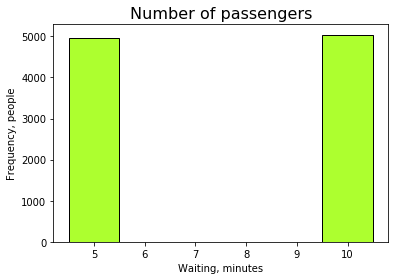

In [1090]:
y = b[:, np.random.randint(0, h[:].max())]
plt.hist(y, rwidth=1, histtype='bar', color='greenyellow', alpha=1, edgecolor='black', bins=np.arange(5,np.max(y) + 2)-0.5);
plt.xlabel('Waiting, minutes', fontsize=10);
plt.ylabel('Frequency, people', fontsize=10);
plt.title('Number of passengers', fontsize=16);

In [946]:
y.mean()

7.461

In [947]:
y.var()

6.2484790000000014

### Пункт В

Загенерю время, когда придет Пумба в минутах

In [953]:
pumba = np.random.randint(0, 721, size = (10**4, 1))
pumba

array([[598],
       [591],
       [675],
       ...,
       [131],
       [384],
       [412]])

На этих автобусах поедет Пумба

In [1021]:
bustime = np.cumsum(b, axis = 1)
pumbabuses = (bustime < pumba).argmin(axis = 1)
pumbabuses

array([82, 80, 86, ..., 15, 51, 55])

In [1045]:
z = b[np.arange(10 ** 4), pumbabuses] + 1
z

array([ 6, 11, 11, ..., 11,  6, 11])

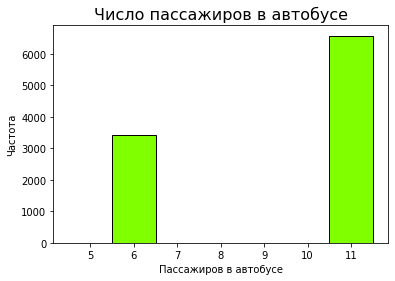

In [1088]:
plt.hist(z, rwidth=1, histtype='bar', color='chartreuse', alpha=1, edgecolor='black', bins=np.arange(5,np.max(z) + 2)-0.5);
plt.xlabel('Пассажиров в автобусе', fontsize=10);
plt.ylabel('Частота', fontsize=10);
plt.title('Число пассажиров в автобусе', fontsize=16);

Математическое ожидание

In [1047]:
z.mean()

9.286

Дисперсия

In [1048]:
z.var()

5.632204000000001

### Пункт Г

In [1057]:
exp = np.random.exponential(scale = 10, size=(10 ** 4, 144))
exp

array([[ 2.0712803 ,  6.35435197, 25.93034837, ...,  0.86107154,
        15.0169462 ,  6.0459463 ],
       [ 3.79368364, 16.68915057,  0.59408898, ..., 10.2195597 ,
         3.7696889 , 13.75311832],
       [ 6.50876136, 25.34846466, 30.45575278, ...,  5.87840443,
        12.06258304,  8.29429038],
       ...,
       [ 0.61862307, 14.79507957,  2.49327773, ..., 18.21113637,
         6.75754318,  8.80869567],
       [15.33733065,  7.89034576,  3.42395114, ..., 11.73441775,
        12.94425911,  7.76665169],
       [ 4.09070121, 36.86368788, 27.49302129, ...,  9.22696567,
         3.83188394, 31.25309773]])

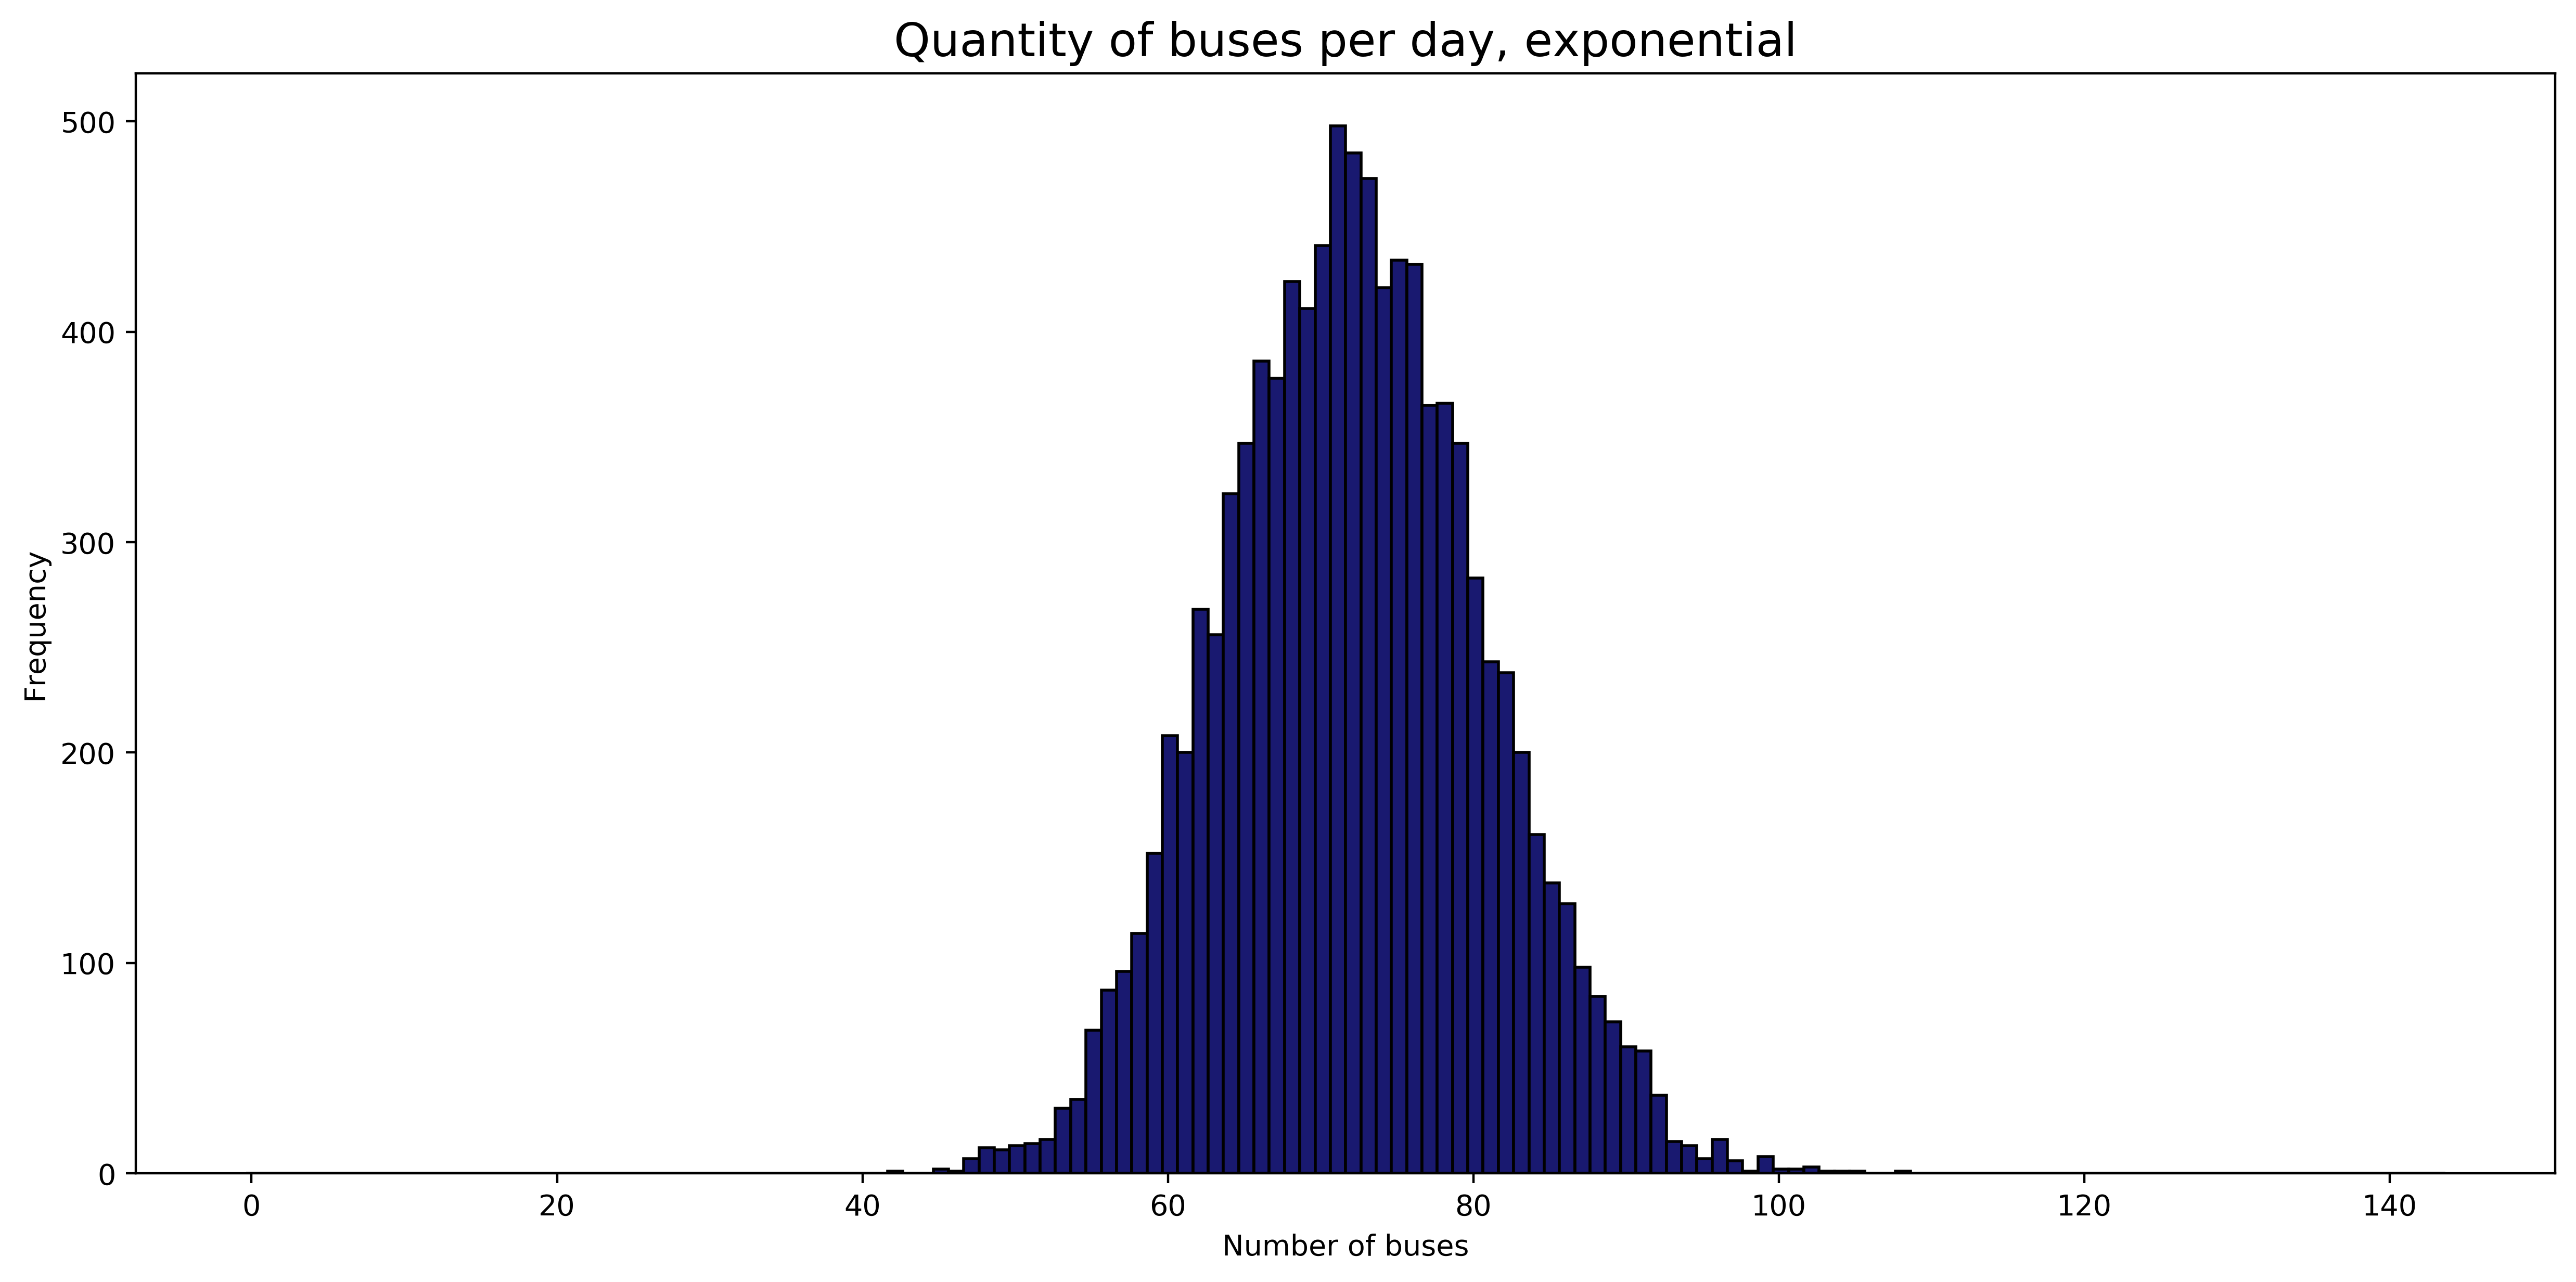

In [1083]:
expcut = (np.cumsum(exp, axis = 1)<=720).argmin(axis = 1)
figure(num=None, figsize=(15, 7), dpi=400, facecolor='w', edgecolor='k')
plt.hist(expcut, rwidth=1, histtype='bar', color='midnightblue', alpha=1, edgecolor='black', bins=np.arange(expcut.mean()-expcut.var(), expcut.mean()+expcut.var()));
plt.xlabel('Number of buses', fontsize=10);
plt.ylabel('Frequency', fontsize=10);
plt.title('Quantity of buses per day, exponential', fontsize=16);

### Инспектор Тимон для экспоненциального

Экспоненциальное распределение как и биномиальное, при больших n сходится к нормальному

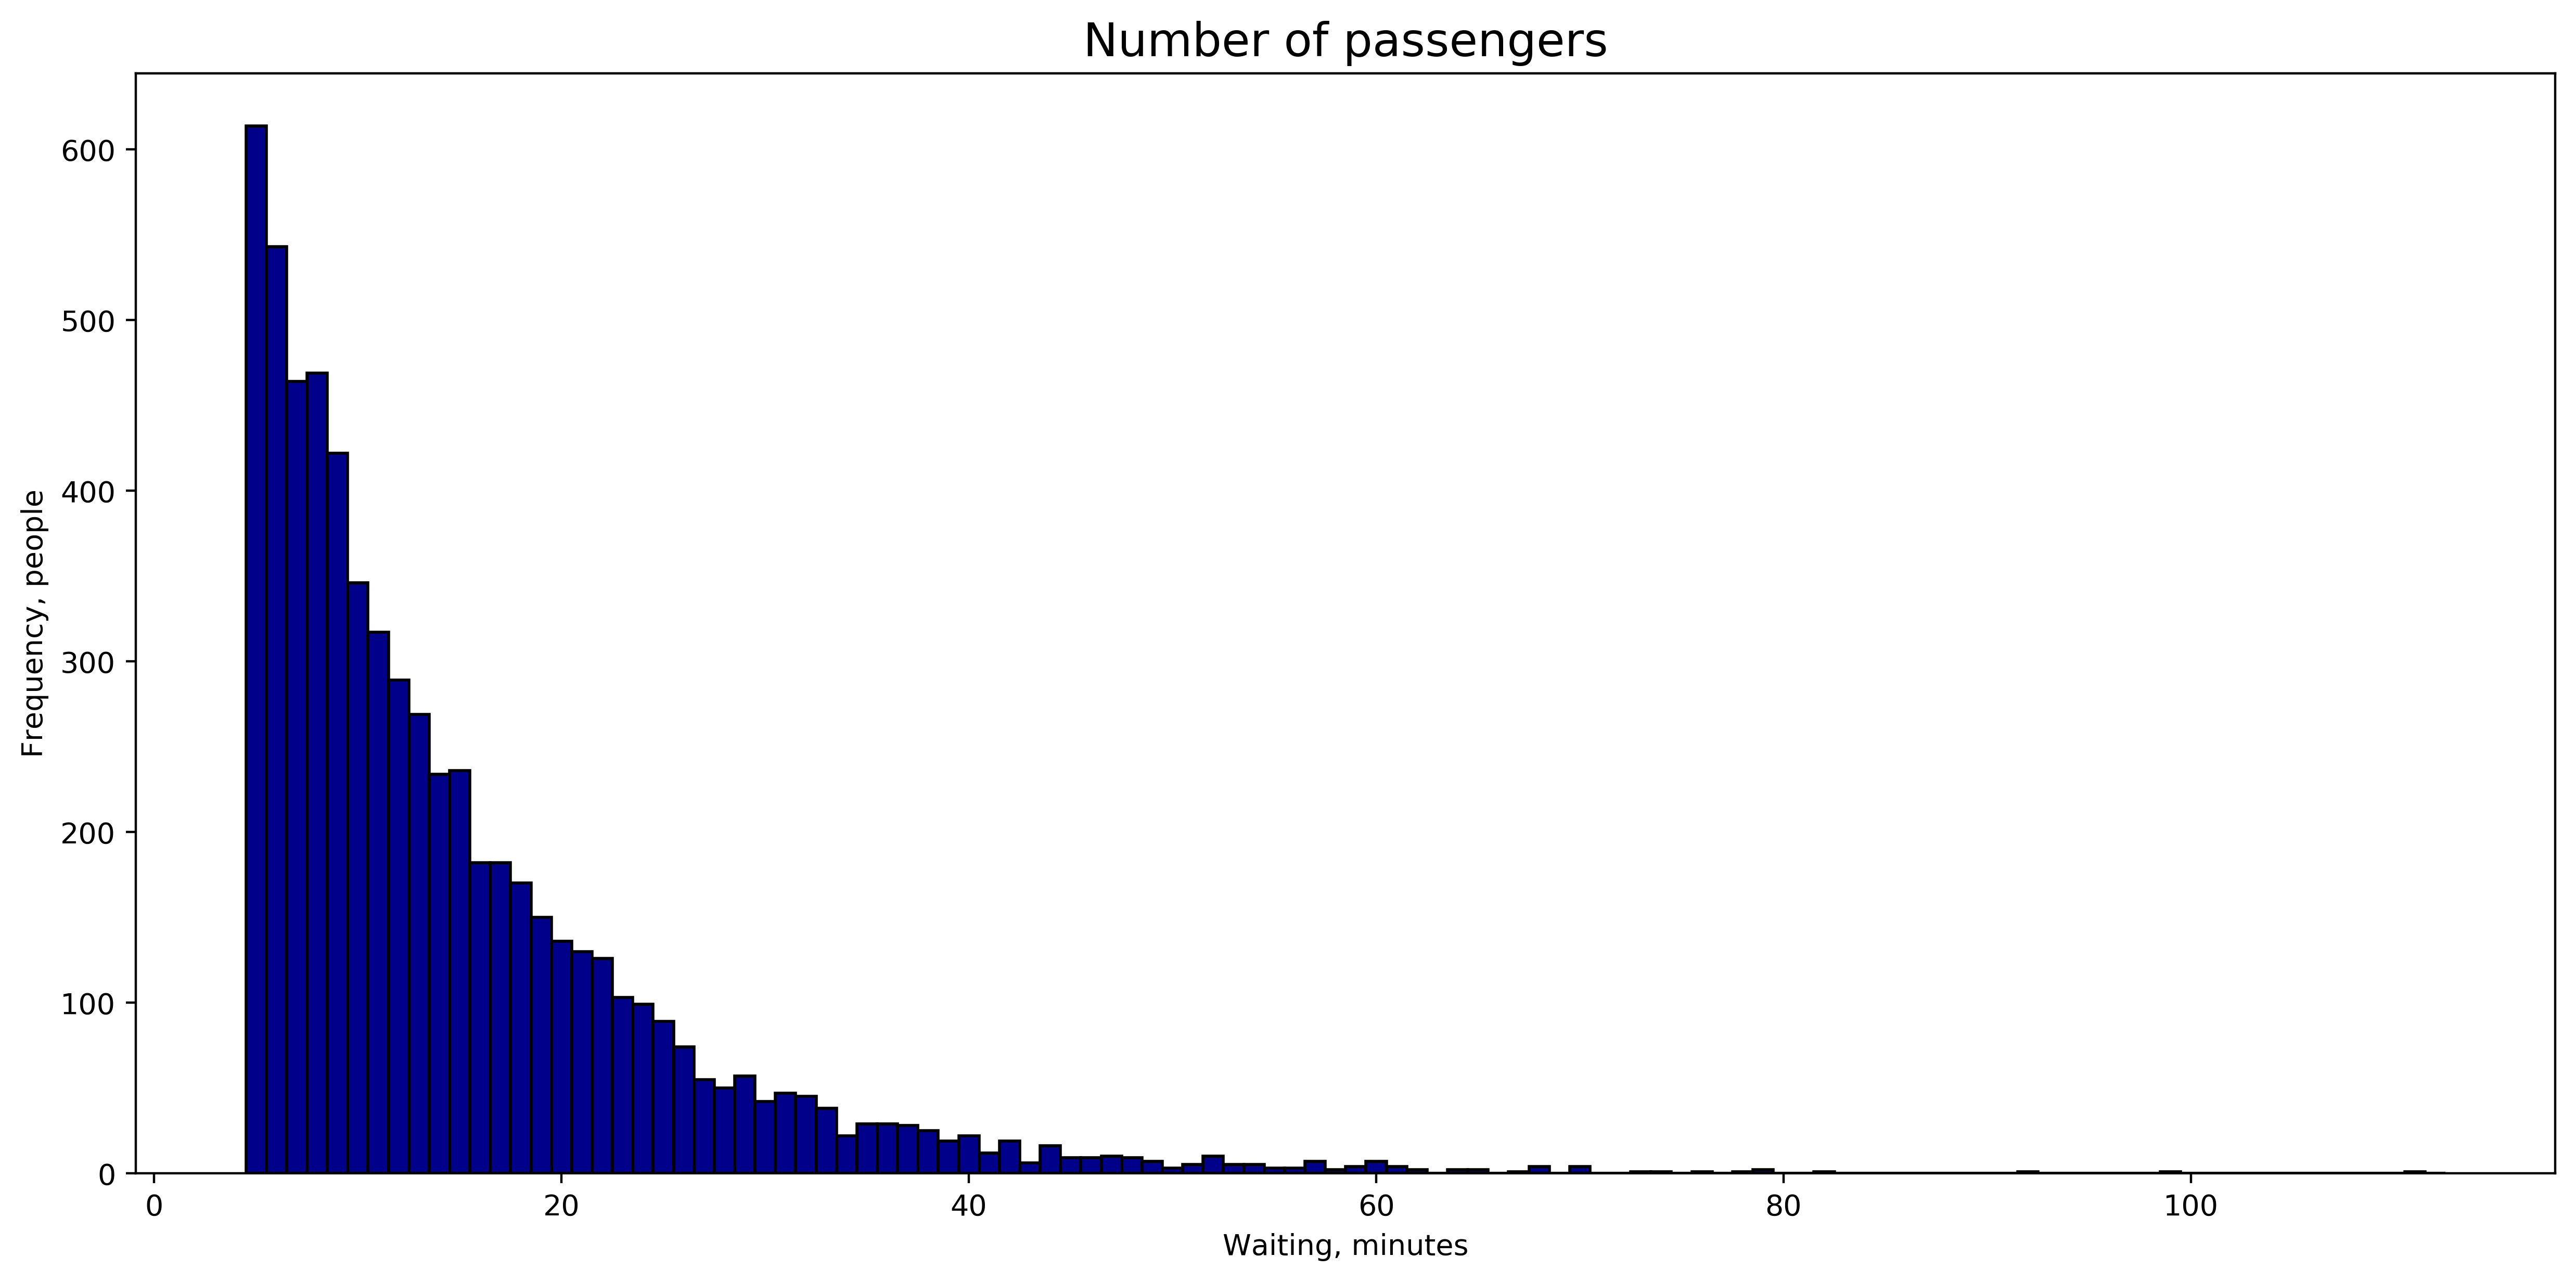

In [1084]:
exp_b = exp[:, np.random.randint(0, h[:].max())]
figure(num=None, figsize=(15, 7), dpi=400, facecolor='w', edgecolor='k')
plt.hist(exp_b, rwidth=1, histtype='bar', color='darkblue', alpha=1, edgecolor='black', bins=np.arange(5,np.max(y) + 2)-0.5);
plt.xlabel('Waiting, minutes', fontsize=10);
plt.ylabel('Frequency, people', fontsize=10);
plt.title('Number of passengers', fontsize=16);

In [1070]:
exp_b.mean()

9.881898352321356

In [1072]:
exp_b.var()

96.2920810564693

### Инспектор Пумба для экспоненциального

In [1075]:
exp_c = exp[np.arange(10 ** 4), pumbabuses] + 1
exp_c

array([83.78222174, 25.44260467, 10.79931186, ..., 13.32383198,
        3.87895103, 21.55739099])

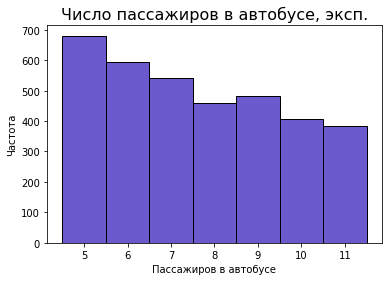

In [1087]:
plt.hist(exp_c, rwidth=1, histtype='bar', color='slateblue', alpha=1, edgecolor='black', bins=np.arange(5,np.max(z) + 2)-0.5);
plt.xlabel('Пассажиров в автобусе', fontsize=10);
plt.ylabel('Частота', fontsize=10);
plt.title('Число пассажиров в автобусе, эксп.', fontsize=16);

In [1079]:
exp_c.mean()

10.763300742078032

In [1081]:
exp_c.var()

93.7829743404613

## Задача 2

In [155]:
a = np.array([1, 2, 3])
np.insert(a, 0, 6)

array([6, 1, 2, 3])

### Пункт А

In [427]:
atos = np.random.binomial(1, 0.49, size = (1, 10 ** 4, 1000))
atos[atos == 0] = -1
atos = np.insert(atos, 0, 1000, axis = 2)
atos_profit = np.cumsum(atos, axis = 2)
atos_profit = np.delete(atos_profit, 0, axis = 2)
atos_profit

array([[[ 999,  998,  997, ...,  996,  997,  998],
        [1001, 1000, 1001, ..., 1016, 1017, 1018],
        [1001, 1000,  999, ...,  932,  933,  932],
        ...,
        [ 999, 1000,  999, ...,  948,  947,  948],
        [1001, 1002, 1003, ..., 1000,  999,  998],
        [1001, 1000,  999, ...,  992,  991,  990]]])

In [428]:
atos_ten_sim = np.random.randint(0, 10 ** 4, size = 10)
atos_ten_visit = np.random.randint(0, 1000, size = 10)
atos_profit = atos_profit.reshape(10 ** 4, 1000)
atos_profit[atos_ten_sim]

array([[ 999,  998,  999, ...,  974,  973,  972],
       [ 999,  998,  997, ...,  898,  897,  898],
       [1001, 1002, 1003, ...,  950,  949,  950],
       ...,
       [1001, 1000, 1001, ...,  982,  981,  982],
       [1001, 1002, 1003, ..., 1022, 1023, 1022],
       [1001, 1000, 1001, ...,  966,  967,  966]])

In [429]:
atos_profit[atos_ten_sim]

array([[ 999,  998,  999, ...,  974,  973,  972],
       [ 999,  998,  997, ...,  898,  897,  898],
       [1001, 1002, 1003, ...,  950,  949,  950],
       ...,
       [1001, 1000, 1001, ...,  982,  981,  982],
       [1001, 1002, 1003, ..., 1022, 1023, 1022],
       [1001, 1000, 1001, ...,  966,  967,  966]])

In [437]:
atos_profit[atos_ten_sim].T.mean(axis = 1)

array([1000.6, 1000.8, 1001.2, 1001.2, 1001.4, 1001.6, 1001.2, 1001.4,
       1001.2, 1001.2, 1001.2, 1001.6, 1001.2, 1000.8, 1000.8, 1000.8,
       1000.6, 1000.6, 1000.6, 1000.6, 1000.6, 1000.6, 1000.4, 1000.4,
       1000.8, 1001. , 1000.8, 1000.4, 1000.4, 1000.4, 1000.2, 1000.4,
       1000.2, 1000.6, 1000.6, 1000.6, 1000.6, 1000.2, 1000.2,  999.6,
       1000.2,  999.4,  999.4,  999.6,  999.6,  999.8,  999.6,  999.6,
       1000. ,  999.2,  999.4,  999.4,  999.4,  999.2,  999.2,  999.2,
        999.4,  999.4,  999.4,  999. ,  999.8, 1000.2, 1000.2, 1000.2,
       1000. ,  999.4,  999. ,  999.4,  999.6, 1000.2,  999.8,  999.6,
        999.2,  999.2,  999.2,  999. ,  998.8,  999. ,  999.2,  999.2,
        998.8,  998.2,  998.2,  998. ,  997.8,  998. ,  998.2,  998.2,
        998.2,  997.4,  997.6,  997.8,  997.8,  997.6,  997.4,  997. ,
        997. ,  996.4,  996.2,  996. ,  995.8,  995.4,  995.6,  995.6,
        996.2,  996. ,  996.4,  996. ,  996.2,  996.4,  996.2,  995.6,
      

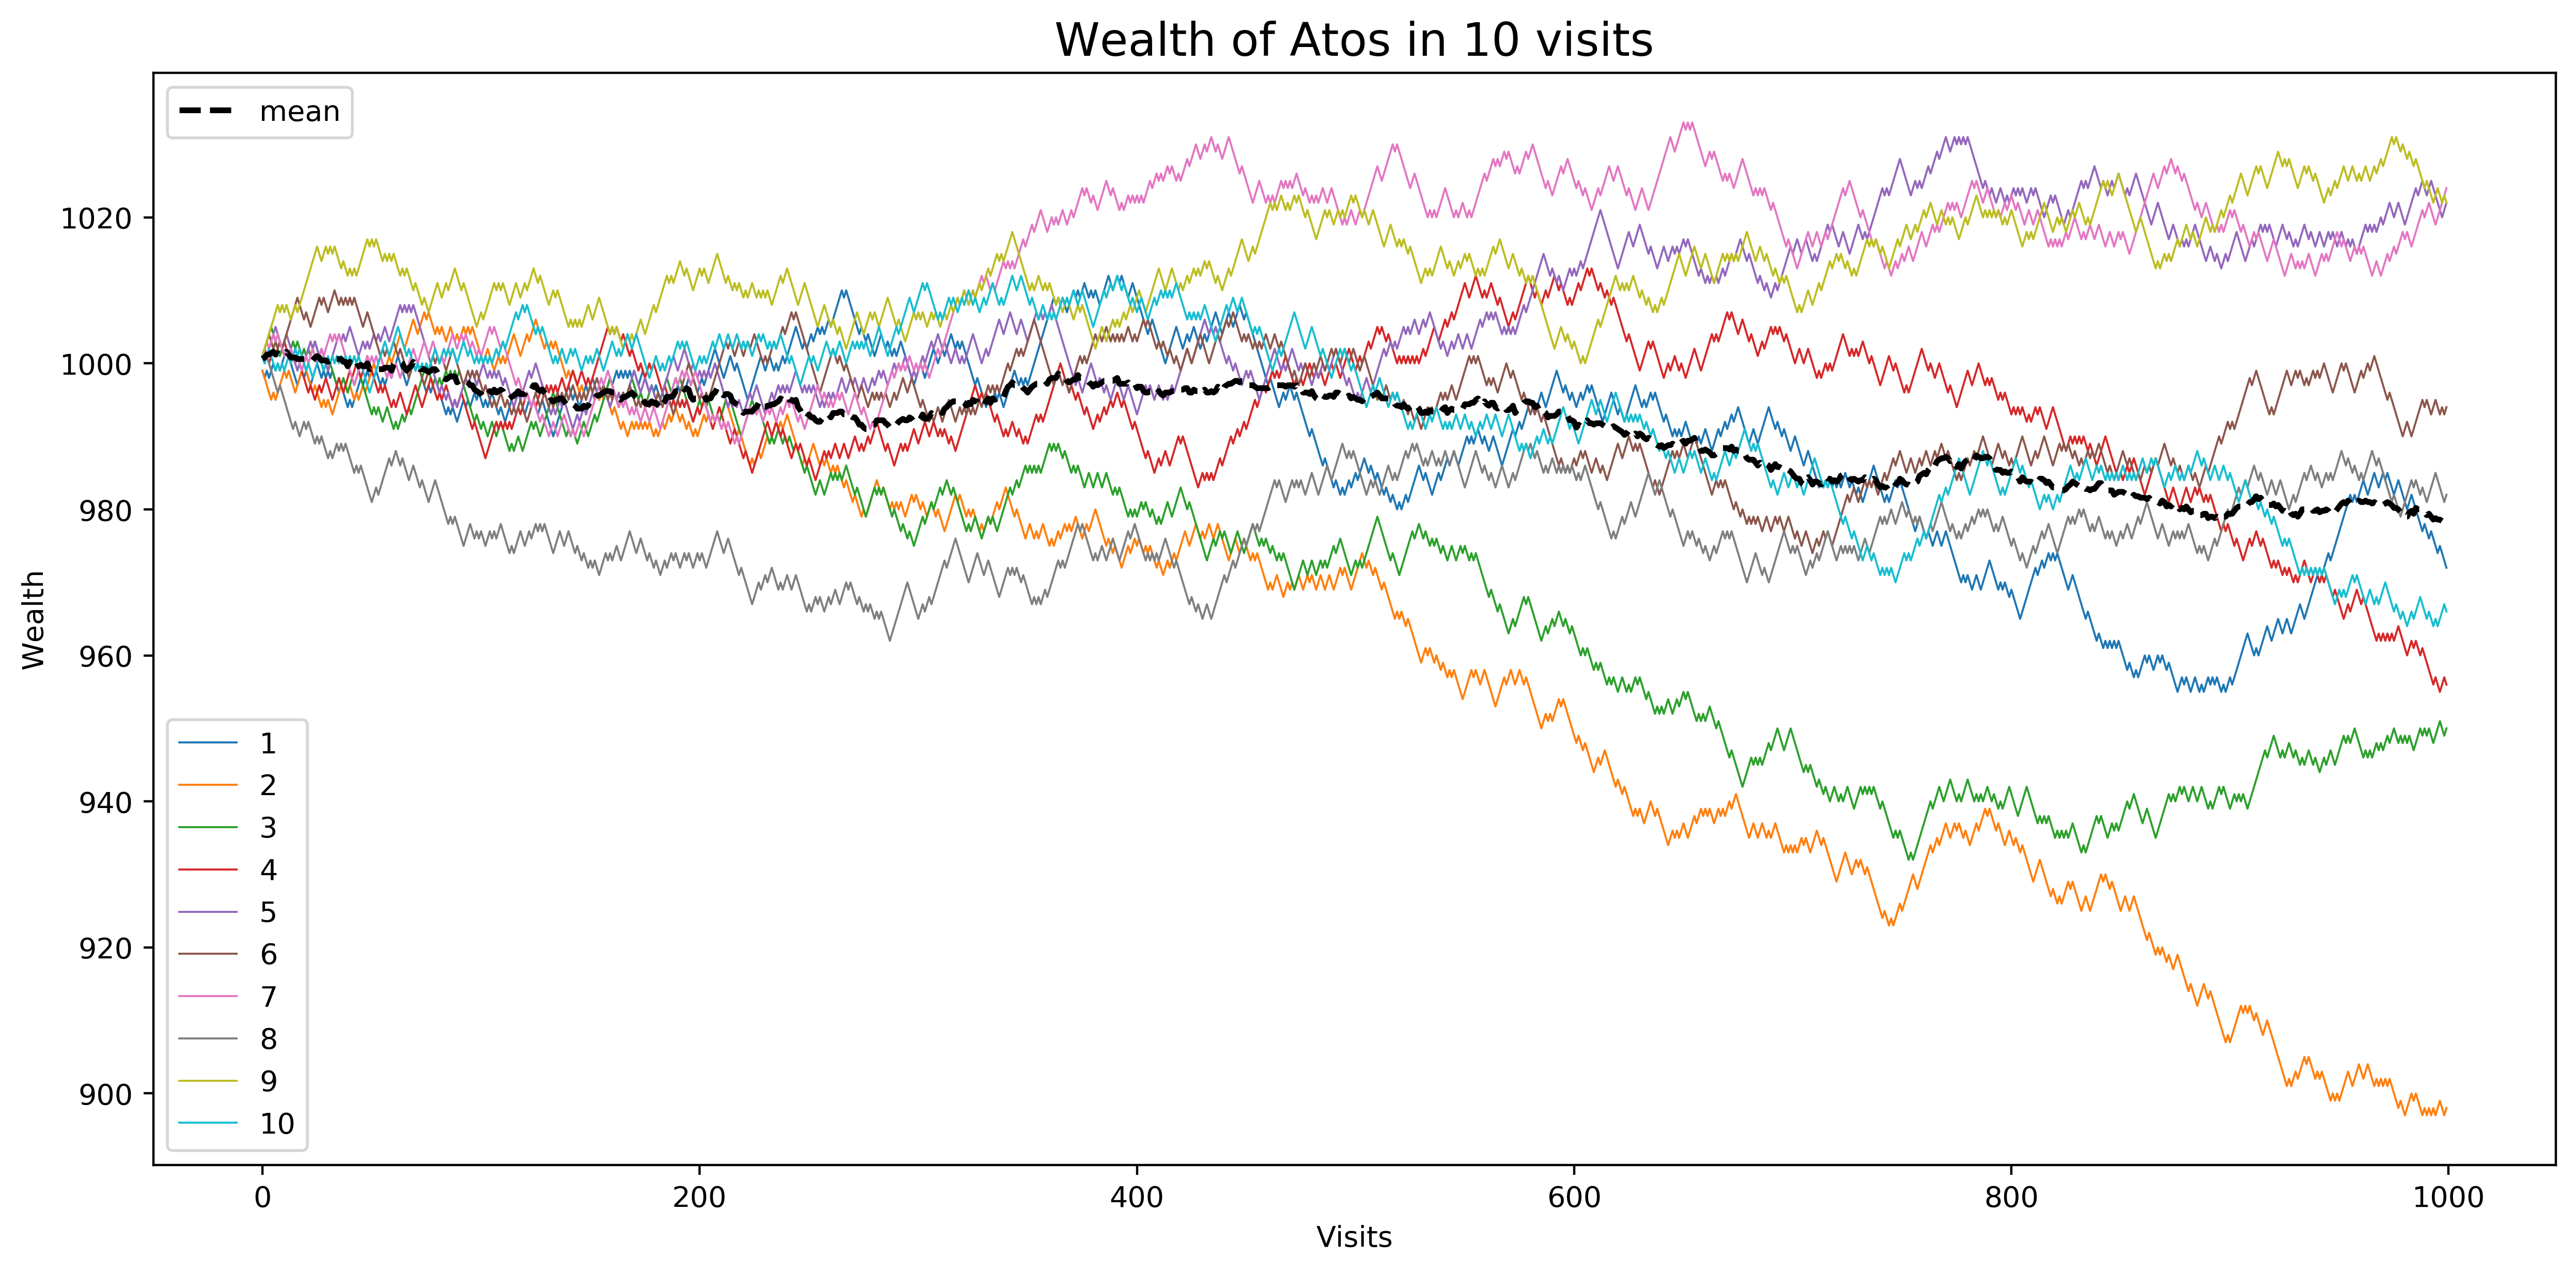

In [544]:
figure(num=None, figsize=(15, 7), dpi=400, facecolor='w', edgecolor='k')
list1 = plt.plot(atos_profit[atos_ten_sim].T, linewidth=0.7);
list2 = plt.plot(atos_profit[atos_ten_sim].T.mean(axis = 1), linewidth = 2, color = 'black', label='mean', linestyle='--')
first_legend = plt.legend(list1, np.arange(1, 11), loc='lower left')
ax = plt.gca().add_artist(first_legend)
plt.legend()
plt.xlabel('Visits', fontsize=10);
plt.ylabel('Wealth', fontsize=10);
plt.title('Wealth of Atos in 10 visits', fontsize=16);

### Пункт Б

In [506]:
portos_wealth_list = []
for j in range(0, 10 ** 4):
    portos_wealth = 1000
    for i in range(0, 1000):
        if portos_wealth % 3 == 0:
                if np.random.binomial(1, 0.09) == 0:
                    portos_wealth = portos_wealth - 1
                else:
                    portos_wealth = portos_wealth + 1
        else:
                if np.random.binomial(1, 0.74) == 0:
                    portos_wealth = portos_wealth - 1
                else:
                    portos_wealth = portos_wealth + 1
        portos_wealth_list.append(portos_wealth)

In [543]:
portos_profit = np.array(portos_wealth_list).reshape(10 ** 4, 1000)
portos_ten_sim = np.random.randint(0, 10 ** 4, size = 10)
portos_profit[portos_ten_sim]
portos_profit[portos_ten_sim].T

array([[1001, 1001, 1001, ..., 1001, 1001,  999],
       [1002, 1002, 1002, ..., 1000, 1002,  998],
       [1003, 1001, 1001, ..., 1001, 1001,  999],
       ...,
       [1004,  990,  992, ...,  994, 1004, 1004],
       [1005,  989,  993, ...,  993, 1005, 1005],
       [1004,  990,  992, ...,  992, 1004, 1004]])

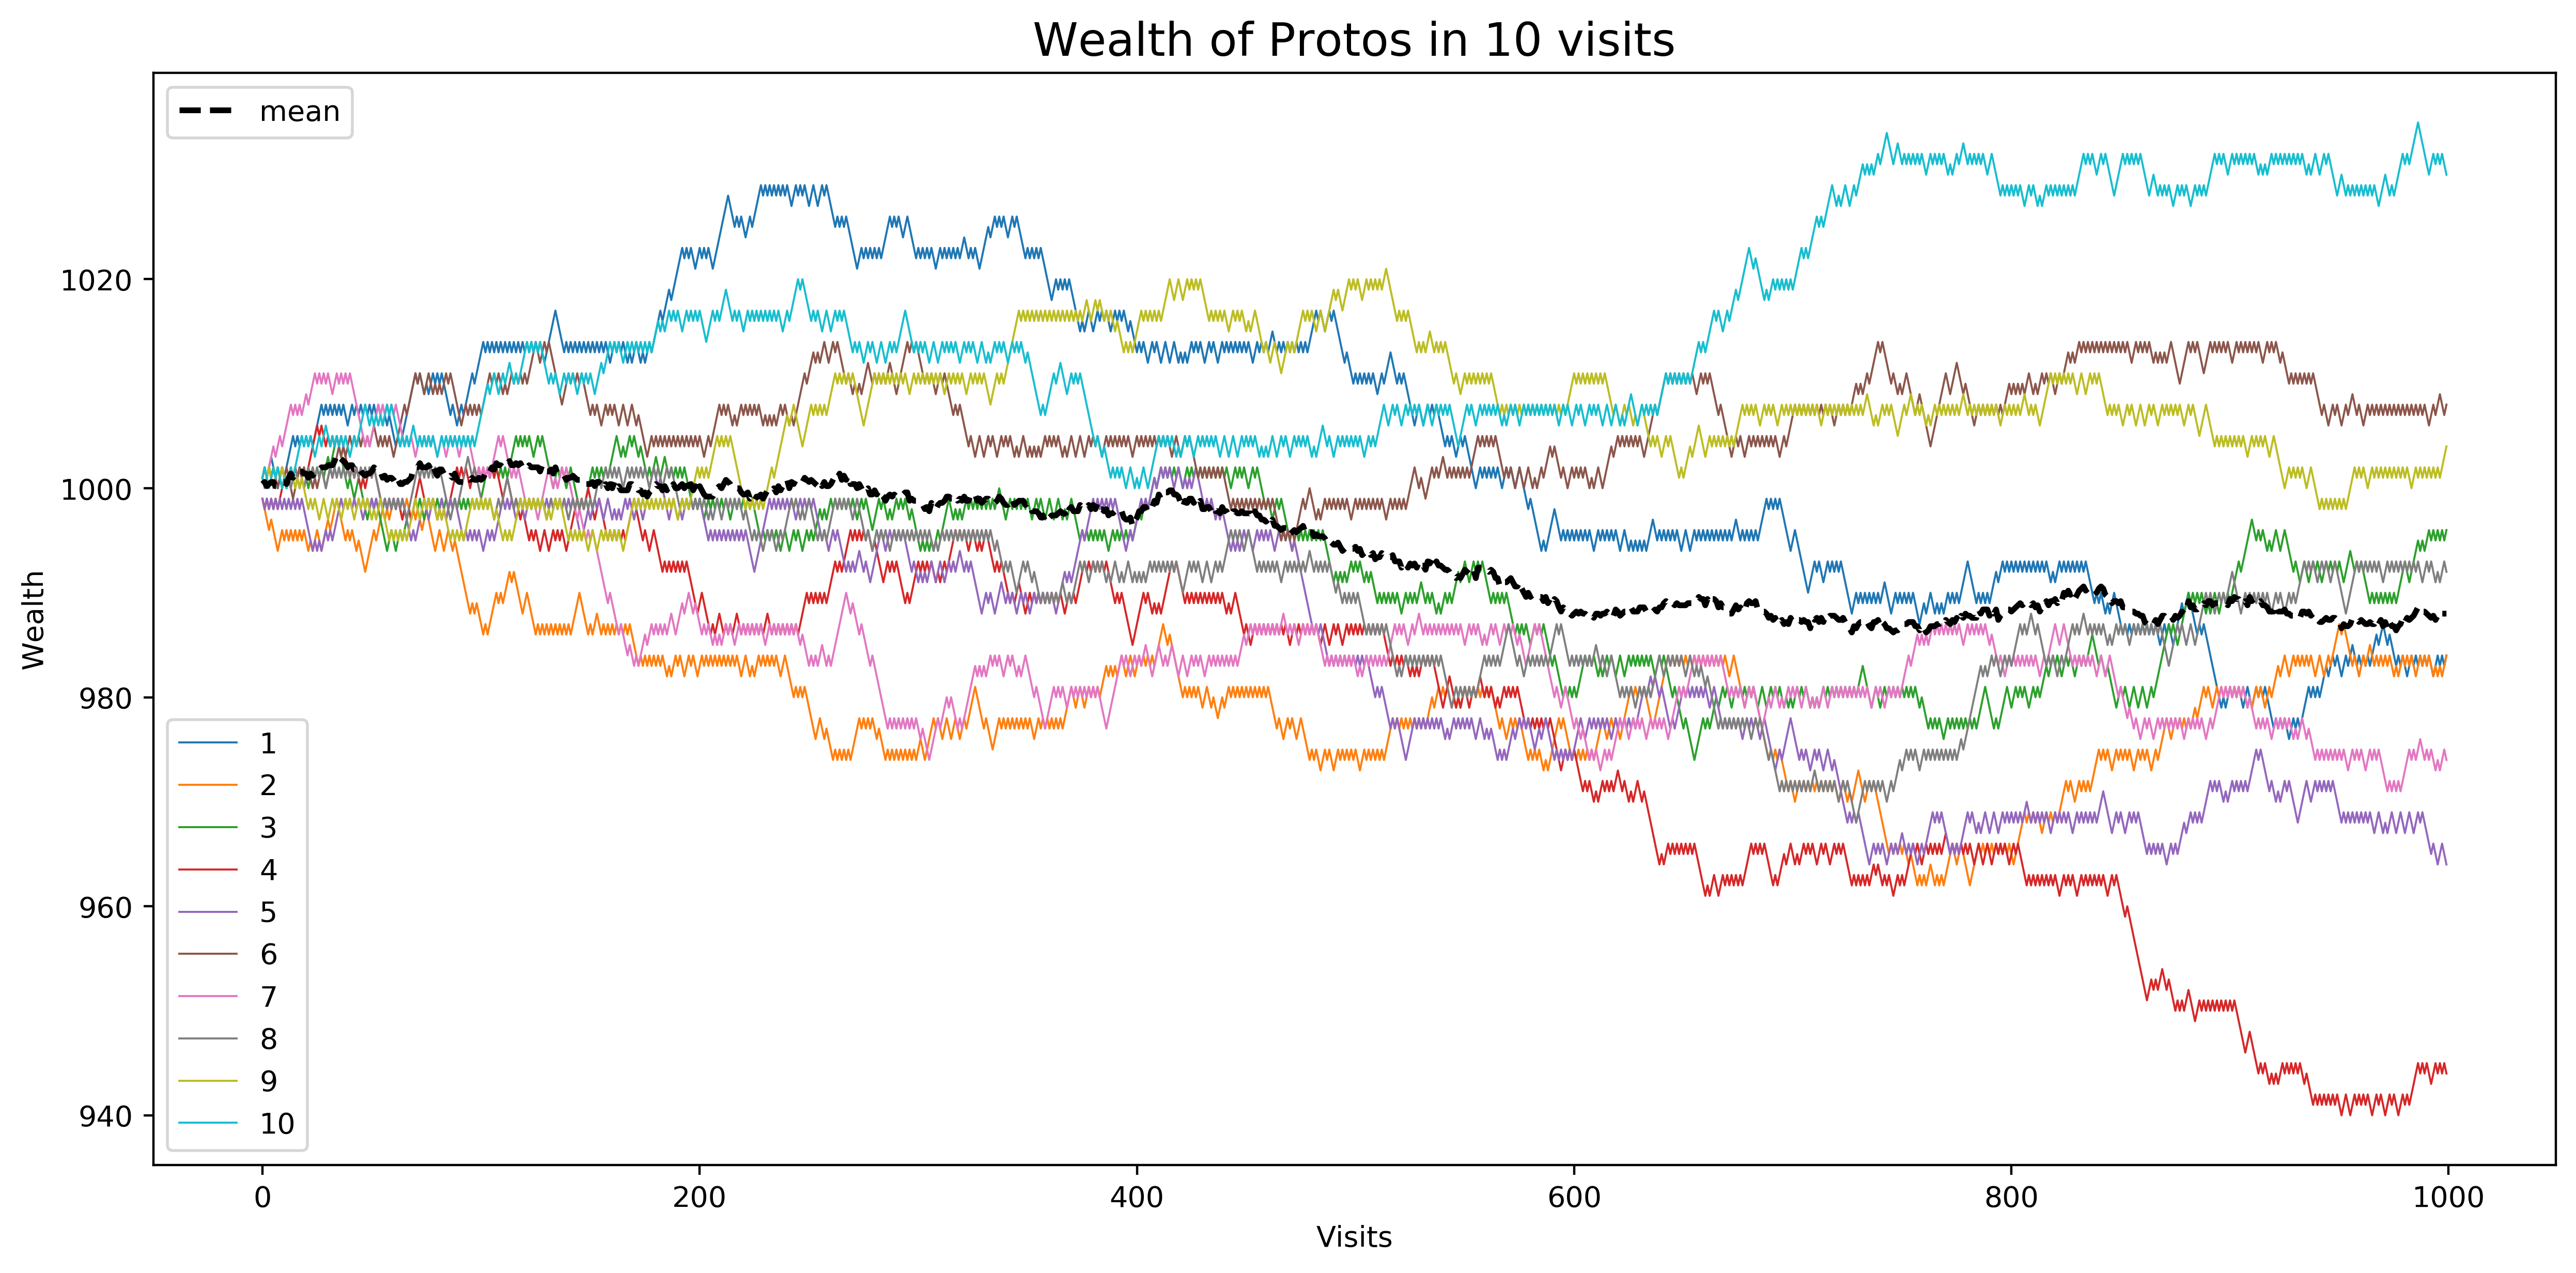

In [539]:
figure(num=None, figsize=(15, 7), dpi=400, facecolor='w', edgecolor='k')
list1 = plt.plot(portos_profit[portos_ten_sim].T, linewidth=0.7);
list2 = plt.plot(portos_profit[portos_ten_sim].T.mean(axis = 1), linewidth = 2, color = 'black', label='mean', linestyle='--')
first_legend = plt.legend(list1, np.arange(1, 11), loc='lower left')
ax = plt.gca().add_artist(first_legend)
plt.legend()
plt.xlabel('Visits', fontsize=10);
plt.ylabel('Wealth', fontsize=10);
plt.title('Wealth of Protos in 10 visits', fontsize=16);

### Пункт В

In [527]:
arzamis_wealth_list = []
for j in range(10 ** 4):
    arzamis_wealth = 1000
    for i in range(0, 1000):
        if np.random.binomial(1, 0.5) == 0:
            if np.random.binomial(1, 0.49) == 1:
                arzamis_wealth = arzamis_wealth + 1
            else:
                arzamis_wealth = arzamis_wealth - 1
        else:
            if arzamis_wealth % 3 == 0:
                if np.random.binomial(1, 0.09) == 0:
                    arzamis_wealth += -1
                else:
                    arzamis_wealth += 1
            else:
                if np.random.binomial(1, 0.74) == 0:
                    arzamis_wealth += -1
                else:
                    arzamis_wealth += 1
        arzamis_wealth_list.append(arzamis_wealth)

In [536]:
arzamis_profit = np.array(arzamis_wealth_list).reshape(10 ** 4, 1000)
arzamis_ten_sim = np.random.randint(0, 10 ** 4, size = 10)
arzamis_profit[arzamis_ten_sim]
arzamis_profit[arzamis_ten_sim].T

array([[1001,  999,  999, ..., 1001, 1001, 1001],
       [1000,  998,  998, ..., 1002, 1000, 1002],
       [1001,  999,  997, ..., 1001, 1001, 1001],
       ...,
       [ 986, 1018, 1046, ..., 1002, 1034,  978],
       [ 985, 1017, 1047, ..., 1001, 1035,  979],
       [ 986, 1018, 1048, ..., 1002, 1036,  980]])

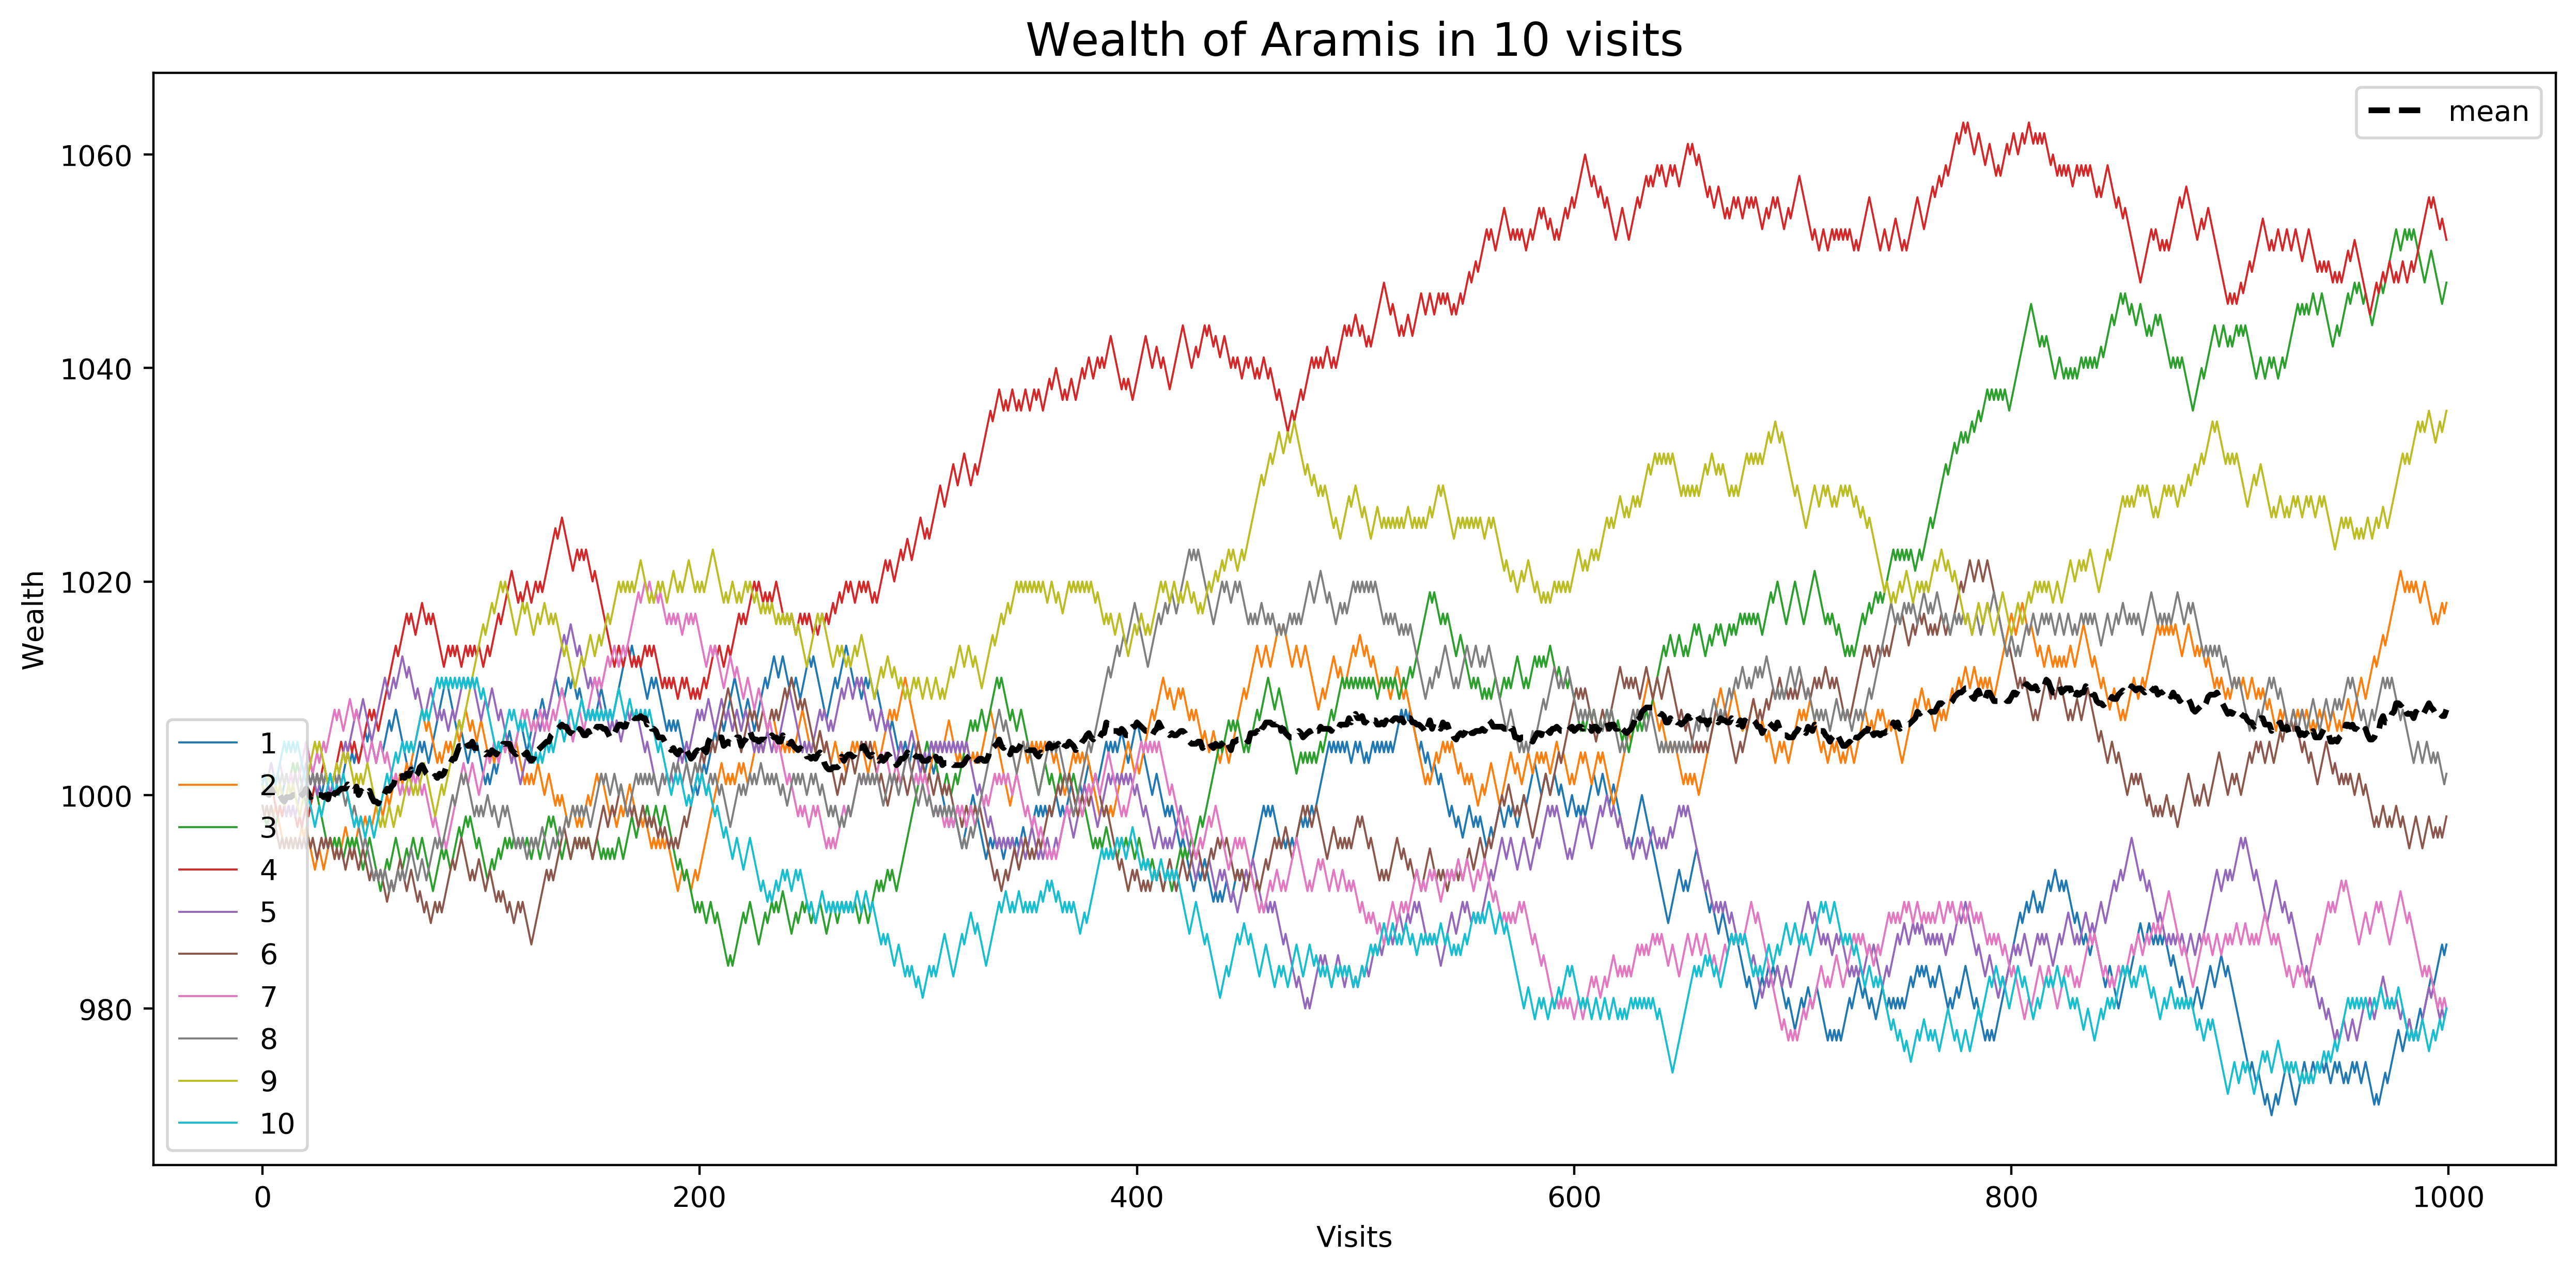

In [545]:
figure(num=None, figsize=(15, 7), dpi=400, facecolor='w', edgecolor='k')
list1 = plt.plot(arzamis_profit[arzamis_ten_sim].T, linewidth=0.7);
list2 = plt.plot(arzamis_profit[arzamis_ten_sim].T.mean(axis = 1), linewidth = 2, color = 'black', label='mean', linestyle='--')
first_legend = plt.legend(list1, np.arange(1, 11), loc='lower left')
ax = plt.gca().add_artist(first_legend)
plt.legend()
plt.xlabel('Visits', fontsize=10);
plt.ylabel('Wealth', fontsize=10);
plt.title('Wealth of Aramis in 10 visits', fontsize=16);

Результаты совпадают с интуицией в парадоксе -- если играть только в стратегию А, либо же только в стратегию Б, то усредненное богатсво будет меньше первоначального, если же комбинировать две стратегии, то усредненное богатство будет больше первоначального

## Задача 3

### Пункт А

In [38]:
steps = np.arange(80, 161, 5)
steps_list = list()
point = np.random.normal(loc = 60, scale = 10, size=(1, 10**4, 2))
point
points = np.sum(point, axis = 2)
points = points.reshape(10 ** 4, 1)
points

array([[113.25975114],
       [114.47152601],
       [118.33313306],
       ...,
       [120.36344482],
       [105.44887737],
       [125.52953672]])

In [36]:
points[points > np.arange(80, 160, 5)]

ValueError: operands could not be broadcast together with shapes (1,10000) (16,) 

array([[152.13264056],
       [121.20910809],
       [136.79582682],
       ...,
       [134.40548668],
       [124.85685918],
       [121.17032451]])

In [1150]:
for i in steps:
    steps_list.append(points[np.where(points >= i)].size)
steps_list

[9978,
 9931,
 9814,
 9587,
 9185,
 8527,
 7511,
 6336,
 4923,
 3633,
 2345,
 1385,
 753,
 389,
 190,
 70,
 23]

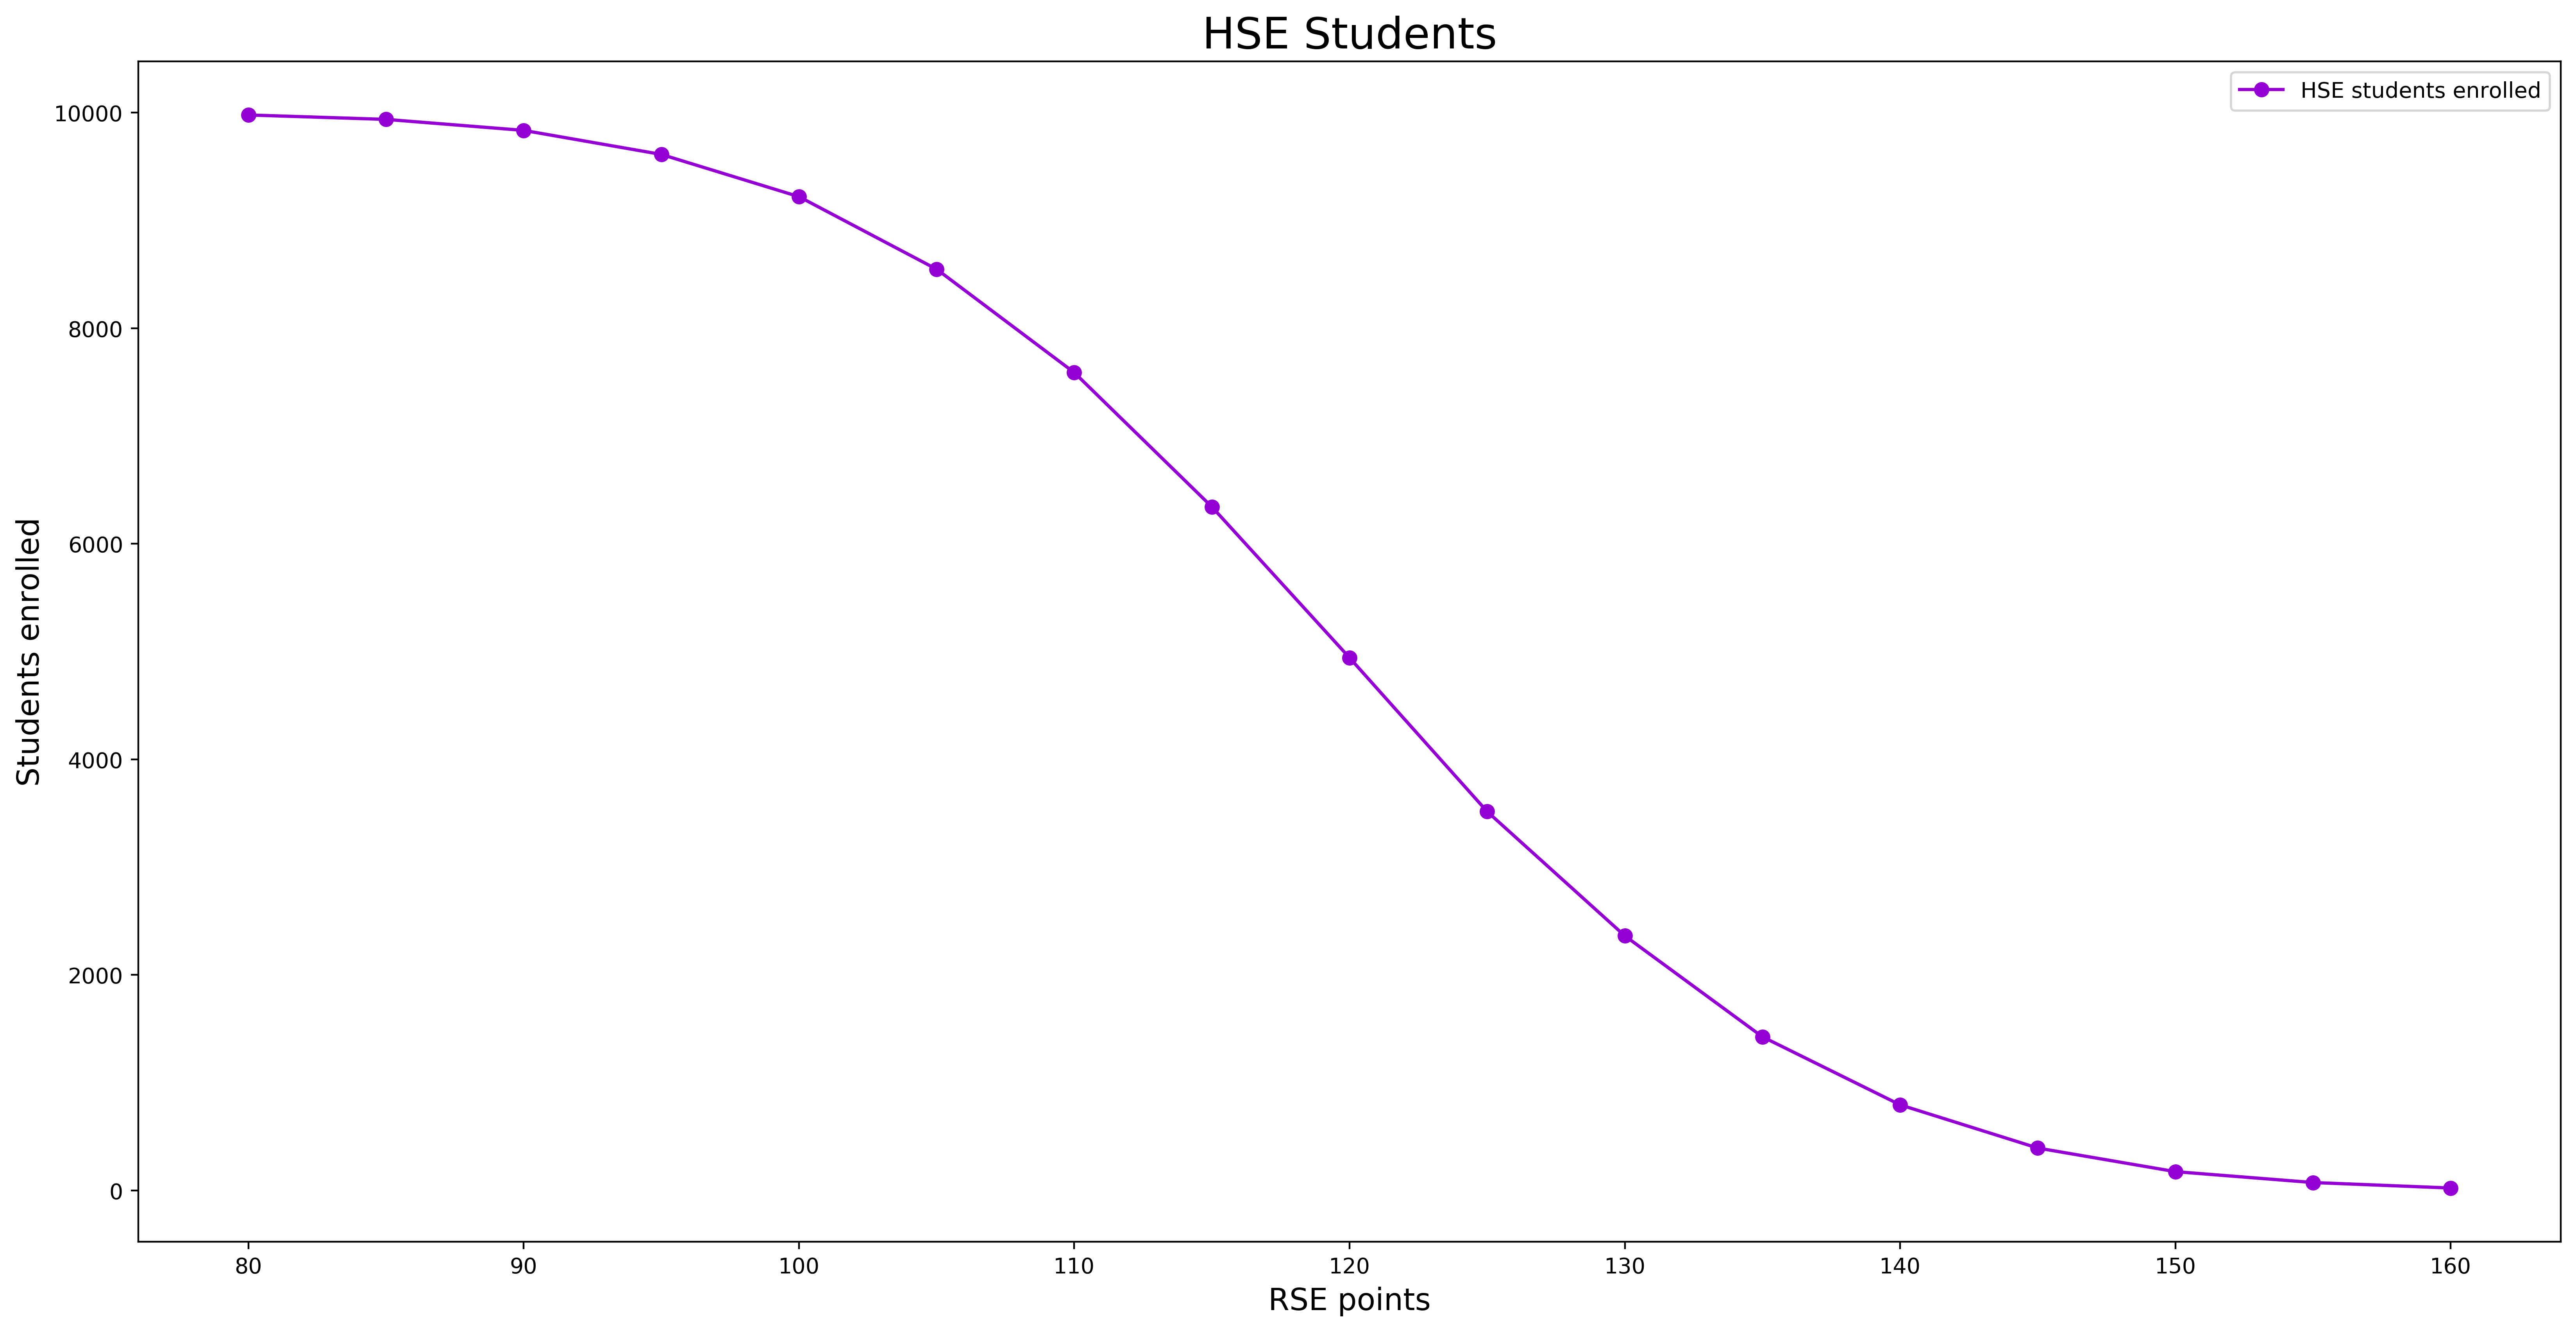

In [1124]:
steps_list = np.array(steps_list)
figure(num=None, figsize=(20, 10), dpi=400, facecolor='w', edgecolor='k')
plt.plot(steps, steps_list, color = 'darkviolet', label = 'HSE students enrolled', marker='o');
plt.legend()
plt.xlabel('RSE points', fontsize=14);
plt.ylabel('Students enrolled', fontsize=14);
plt.title('HSE Students', fontsize=20);

### Пункт Б

In [103]:
coef_list = list()
for i in steps:
    coef_list.append(pearsonr(point[np.where(points >= i)][:, 0], point[np.where(points >= i)][:, 1])[0])
coef_list

[-0.01000044828463346,
 -0.02220034880547652,
 -0.04627493368852541,
 -0.08503798577368116,
 -0.13807586827335014,
 -0.2093788646944167,
 -0.28753893991096735,
 -0.36935001298591635,
 -0.4526256984706678,
 -0.5418407182140923,
 -0.6118316989180235,
 -0.670346982628914,
 -0.7135576341073484,
 -0.7661981181087685,
 -0.8137920044967637,
 -0.8365126613313936,
 -0.776407603944486]

In [104]:
coef_list = np.array(coef_list)
coef_list

array([-0.01000045, -0.02220035, -0.04627493, -0.08503799, -0.13807587,
       -0.20937886, -0.28753894, -0.36935001, -0.4526257 , -0.54184072,
       -0.6118317 , -0.67034698, -0.71355763, -0.76619812, -0.813792  ,
       -0.83651266, -0.7764076 ])

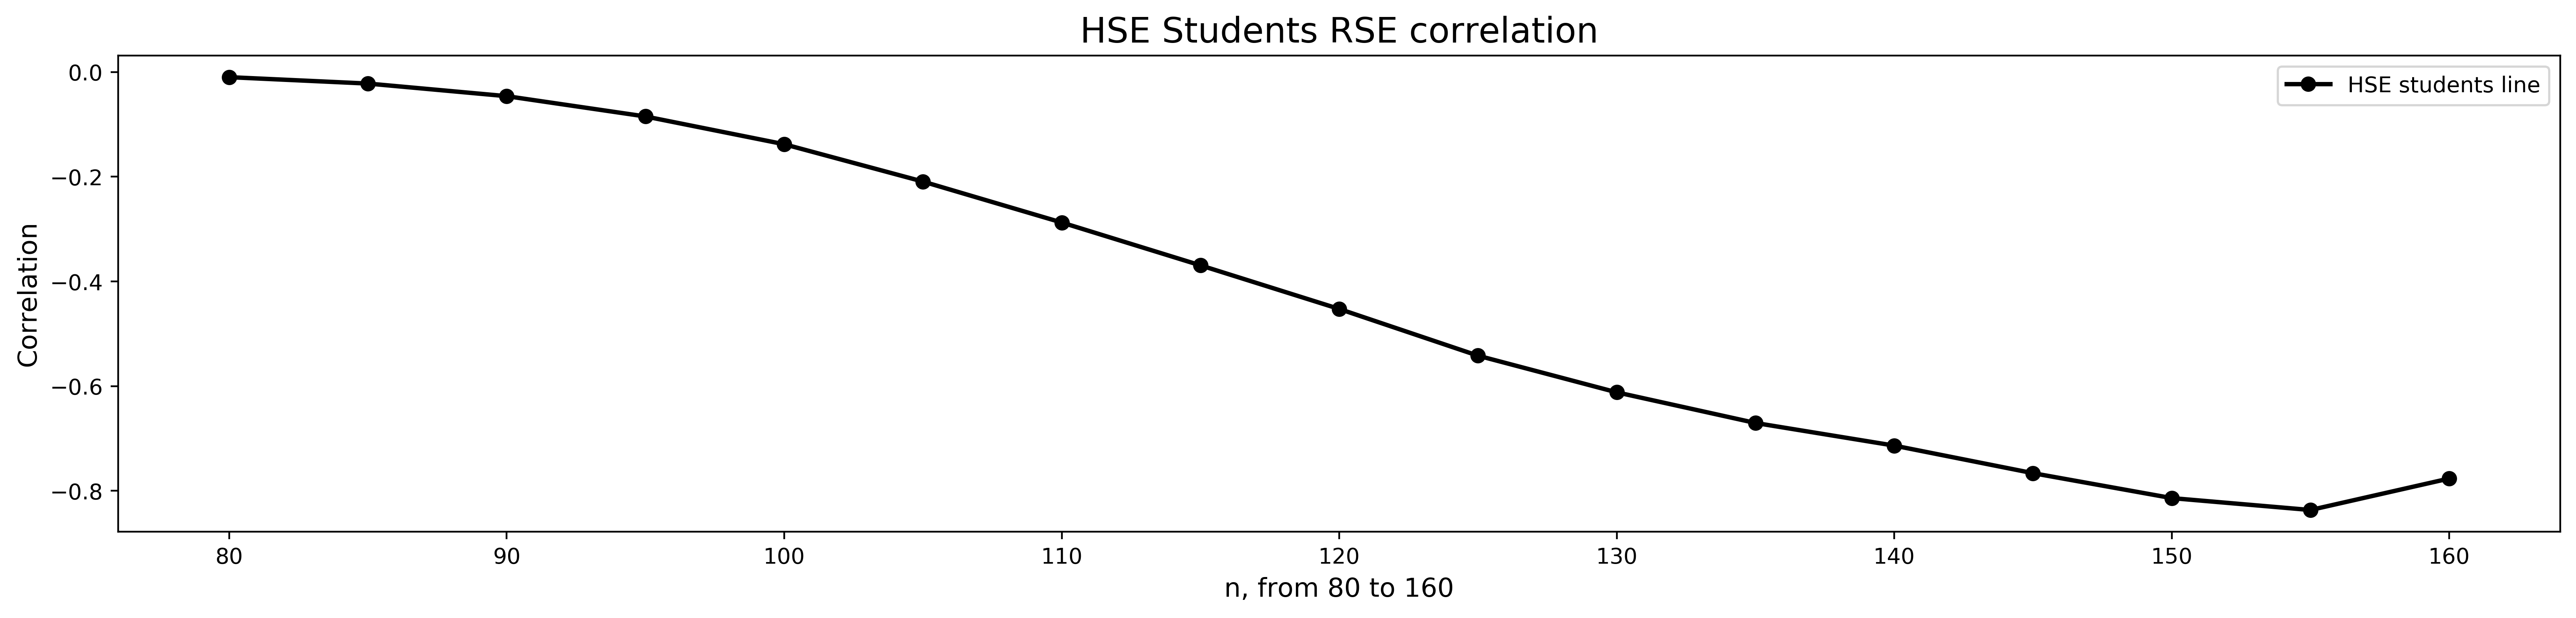

In [1125]:
figure(num=None, figsize=(20, 4), dpi=400, facecolor='w', edgecolor='k')
plt.plot(steps, coef_list, color = 'black', linewidth = 2, label = 'HSE students line', marker='o');
plt.xlabel('n, from 80 to 160', fontsize=12);
plt.legend()
plt.ylabel('Correlation', fontsize=12);
plt.title('HSE Students RSE correlation', fontsize=16);

### Пункт В

In [1157]:
coef_list_comp = list()
for i in steps:
    coef_list_comp.append(pearsonr(point[np.where(points < i)][:, 0], point[np.where(points < i)][:, 1])[0])
coef_list_comp = np.array(coef_list_comp)
coef_list_comp

array([-0.87802798, -0.78111755, -0.75622232, -0.75884281, -0.72773612,
       -0.66933534, -0.60730617, -0.54850971, -0.45864327, -0.36949619,
       -0.28229362, -0.20061401, -0.13807945, -0.08412287, -0.04579851,
       -0.01737067, -0.00268894])

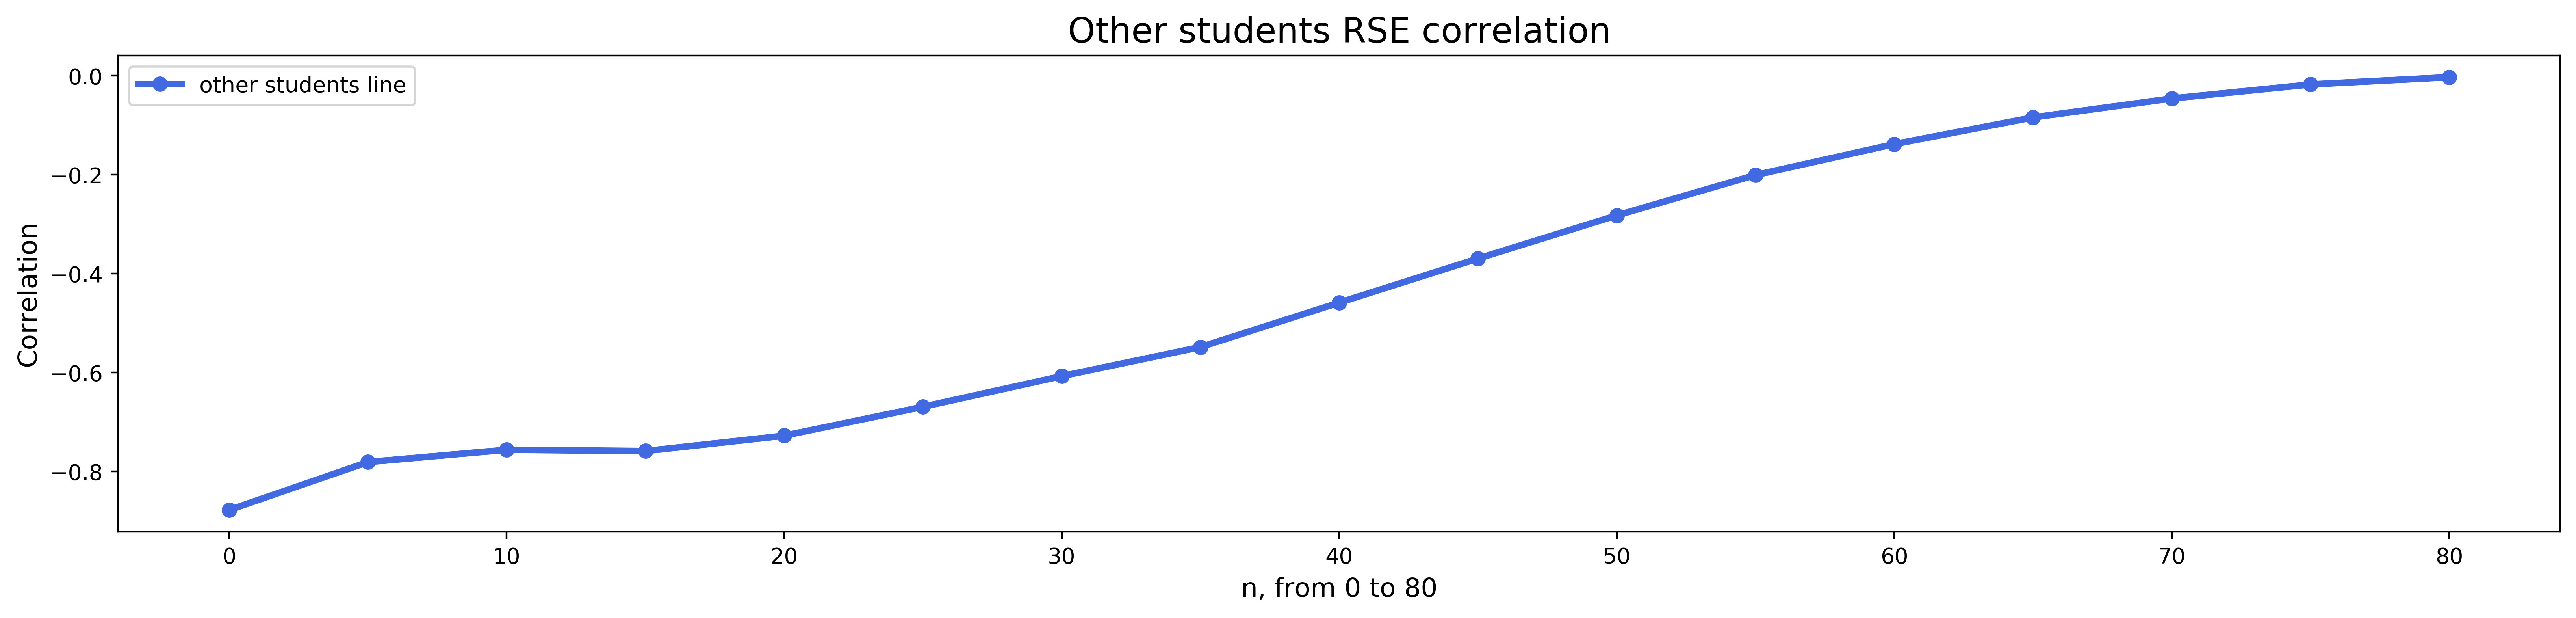

In [1158]:
figure(num=None, figsize=(20, 4), dpi=400, facecolor='w', edgecolor='k')
plt.plot(np.arange(0, 81, 5), coef_list_comp, color='royalblue', linewidth = 3, label = 'other students line', marker='o');
plt.xlabel('n, from 0 to 80', fontsize=12);
plt.ylabel('Correlation', fontsize=12);
plt.legend();
plt.title('Other students RSE correlation', fontsize=16);

Результаты совпадают с интуицией: два независимых объекта при добавлении некоторого условия, становятся негативно коррелируемыми

## Задача 4

### Пункт А

In [771]:
nif = np.random.normal(60, 10, size = (10 ** 4, 100))
naf = np.random.normal(70, 10, size = (10 ** 4, 100))
nuf = np.random.normal(80, 10, size = (10 ** 4, 100))

Использую для этого fit. Из тервера: $\hat \mu_{mle} = \frac {1} {n} * \sum {X_i}$

In [578]:
def mle(x):
    mu, s = stats.norm.fit(x)
    return mu

In [645]:
mle(nif[0])

60.63453317912564

In [644]:
nif[0].mean()

60.63453317912564

Можно было все это загнать в цикл, но мы же знаем, что MLE оценка это среднее,что было показано через stats.norm.fit выше, поэтому воспользуюсь стандартным нумпаевским методом mean. Тем более, циклы для $10 ^ 4$ очень медленные.

In [613]:
nif.mean(axis = 1)

array([59.84327207, 61.09414826, 59.23898069, ..., 59.54031958,
       61.50651695, 60.24283688])

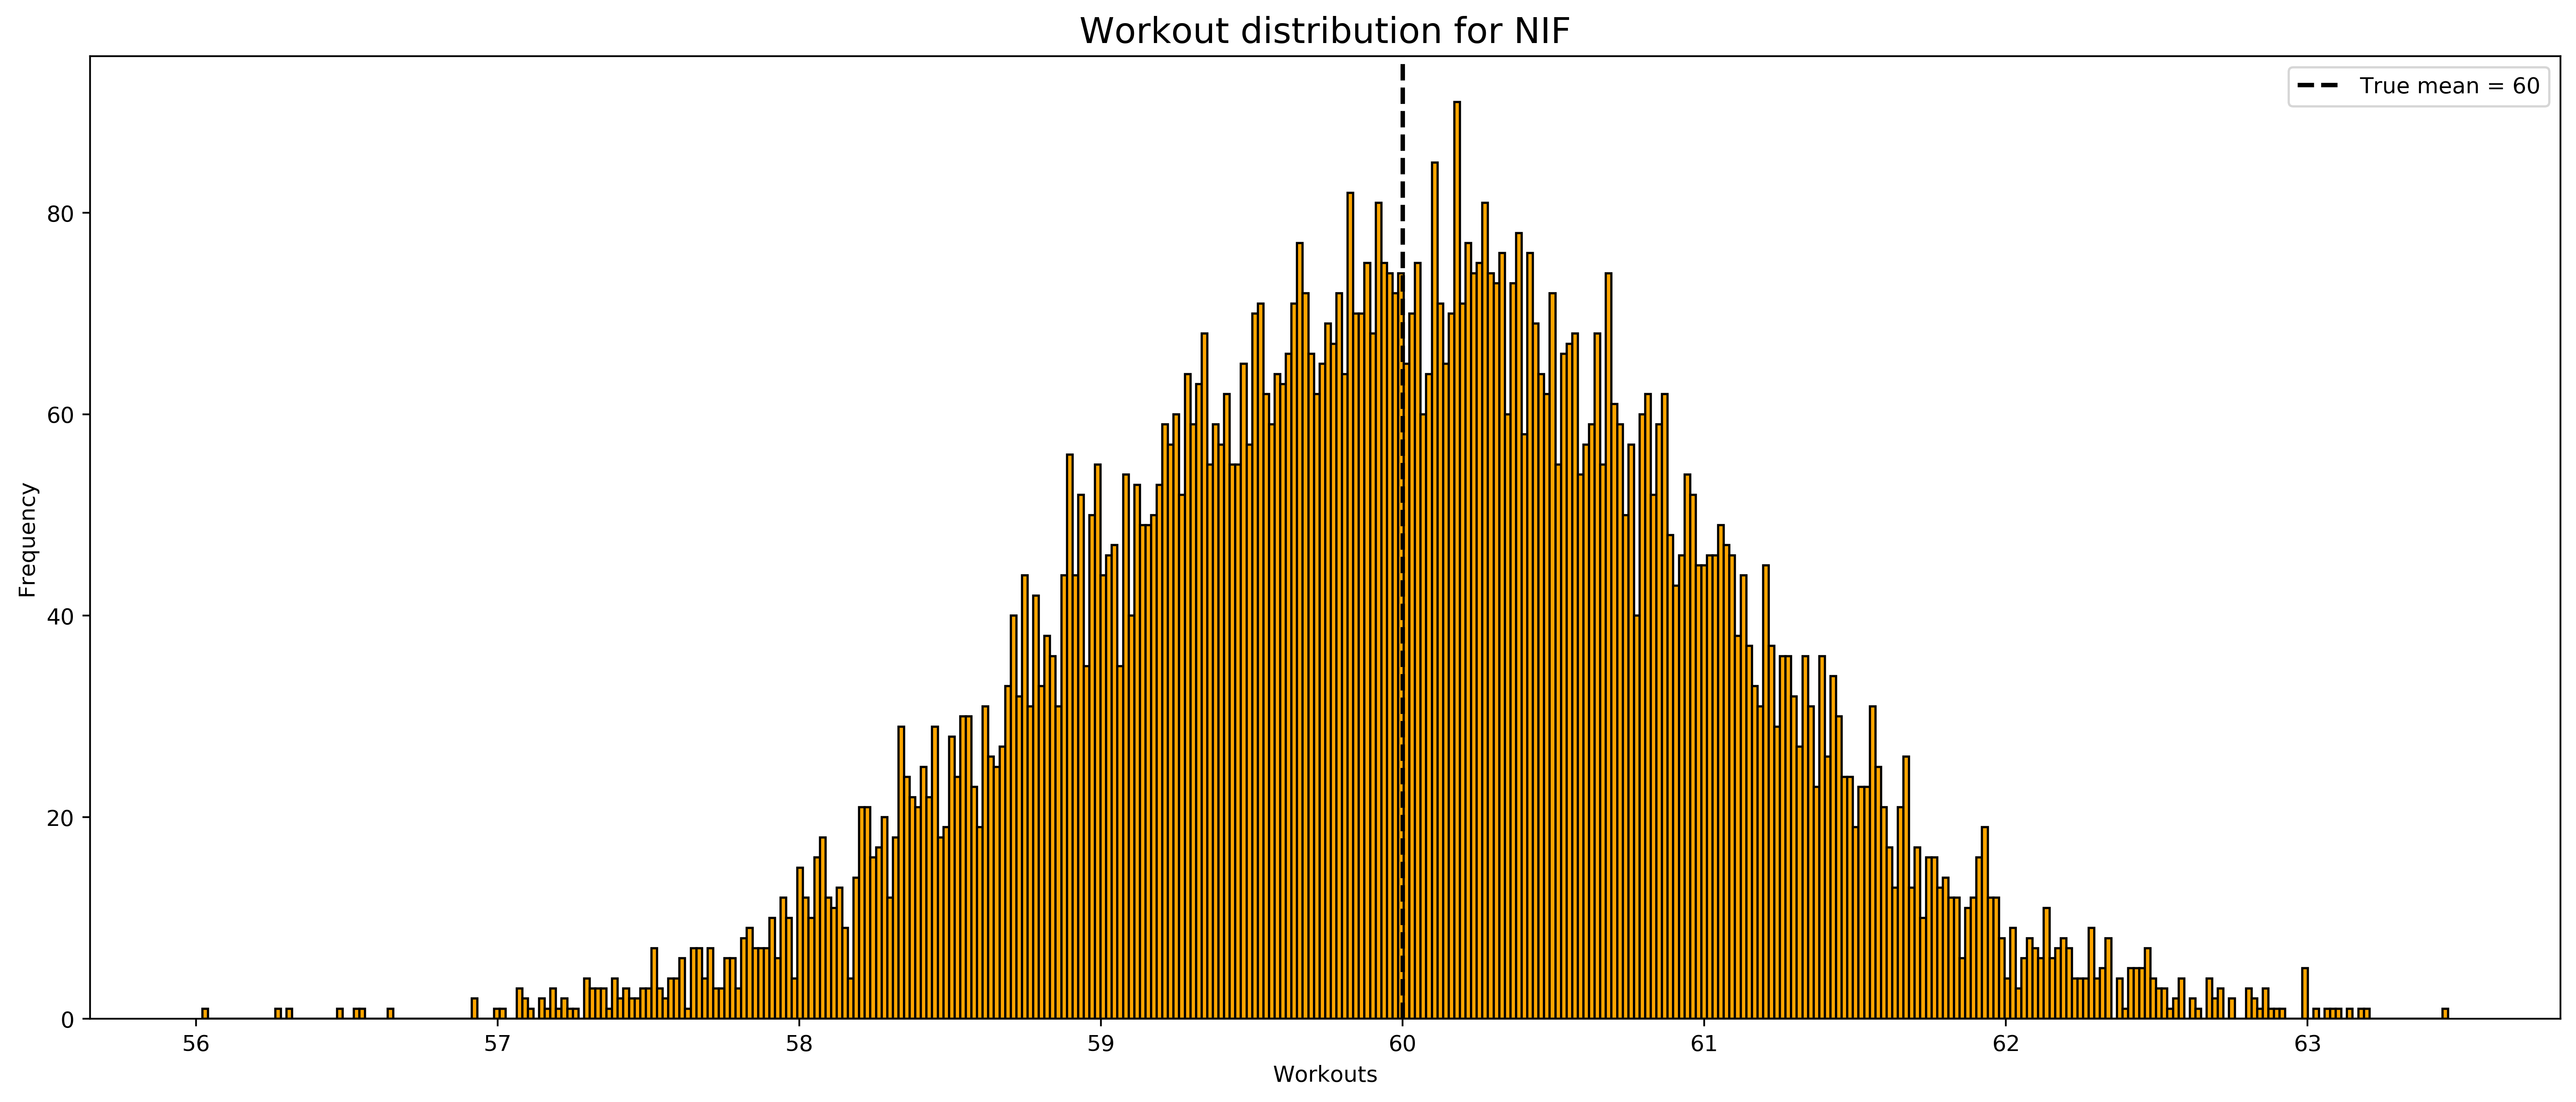

In [656]:
figure(num=None, figsize=(20, 8), dpi=400, facecolor='w', edgecolor='k')
plt.hist(nif.mean(axis = 1), rwidth=1, histtype='bar', color='orange', alpha=1, edgecolor='black', bins=400);
plt.xlabel('Workouts', fontsize=10);
plt.ylabel('Frequency', fontsize=10);
plt.title('Workout distribution for NIF', fontsize=16);
plt.axvline(60, color='k', linestyle='dashed', linewidth=2, label='True mean = 60')
plt.legend();

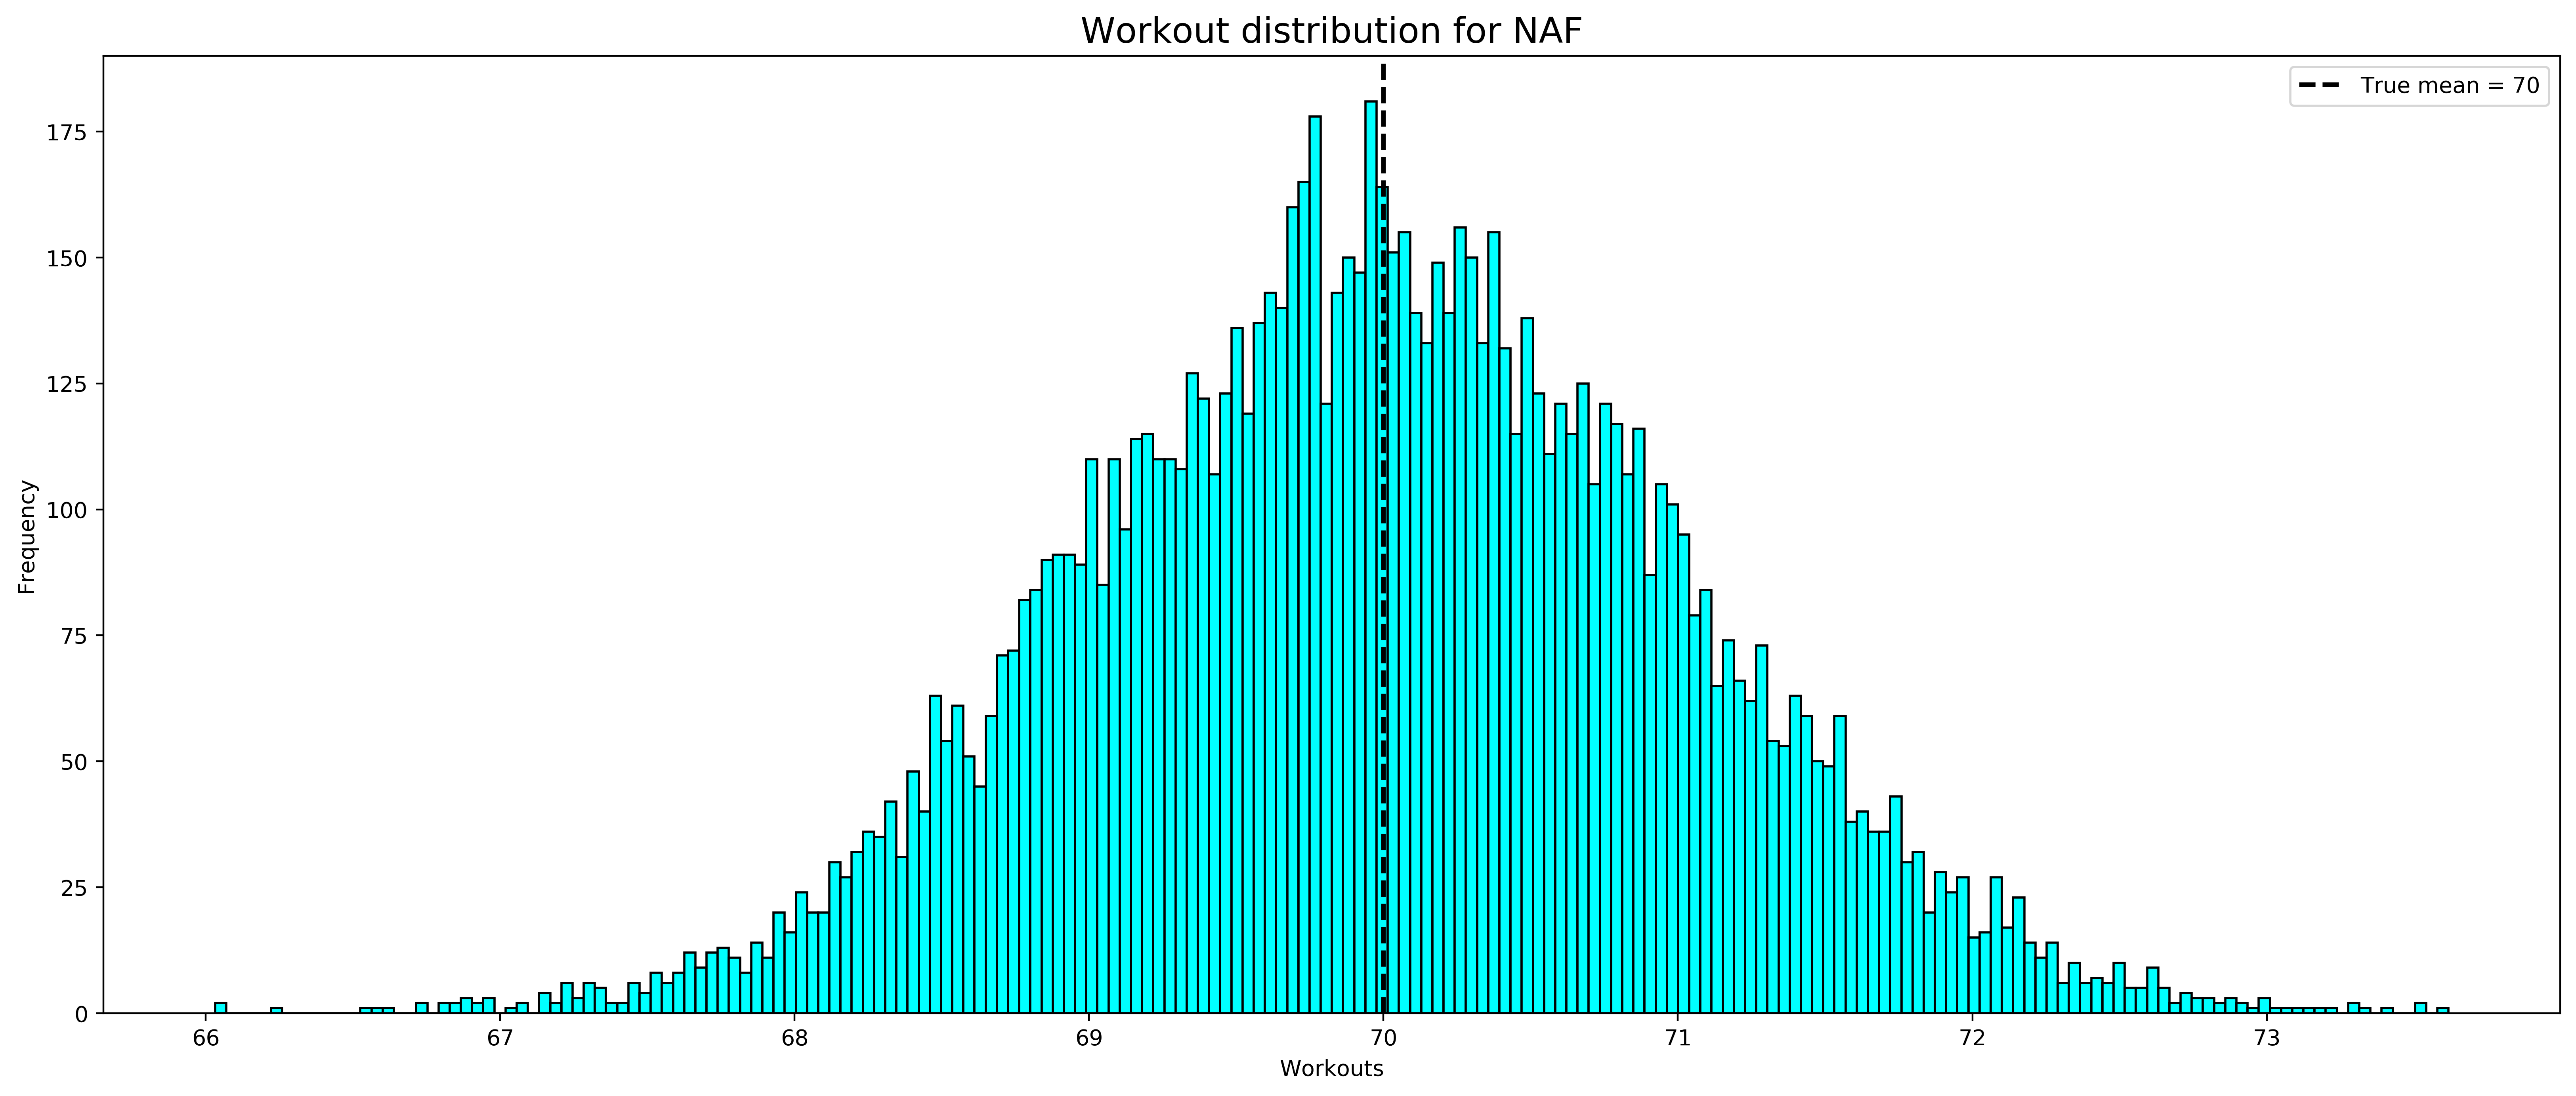

In [657]:
figure(num=None, figsize=(20, 8), dpi=400, facecolor='w', edgecolor='k')
plt.hist(naf.mean(axis = 1), rwidth=1, histtype='bar', color='aqua', alpha=1, edgecolor='black', bins=200);
plt.xlabel('Workouts', fontsize=10);
plt.ylabel('Frequency', fontsize=10);
plt.title('Workout distribution for NAF', fontsize=16);
plt.axvline(70, color='k', linestyle='dashed', linewidth=2, label='True mean = 70')
plt.legend();

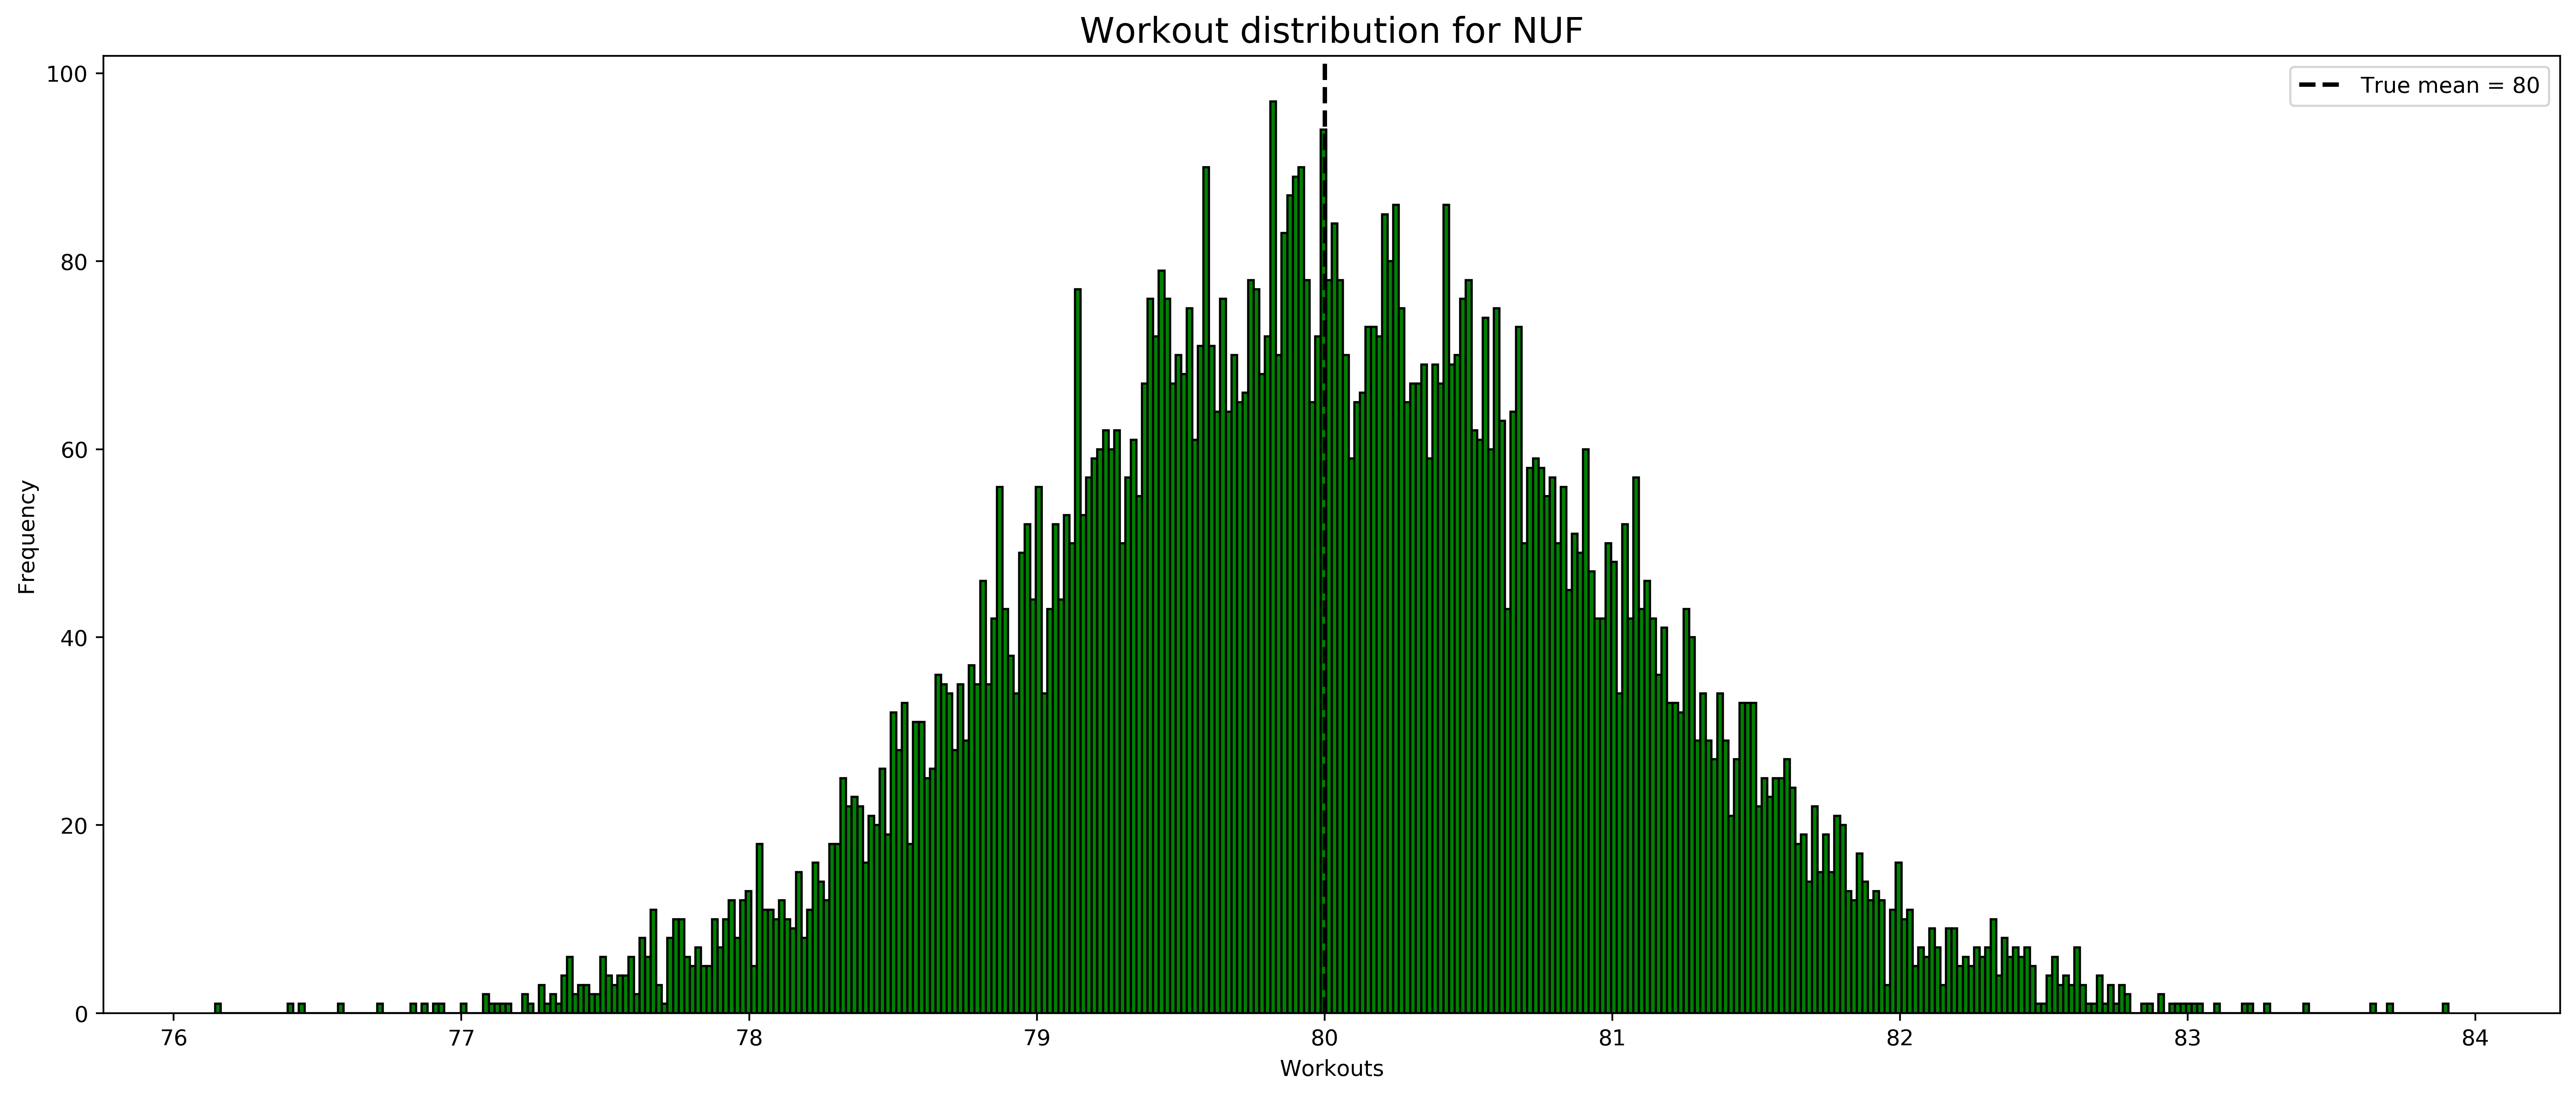

In [654]:
figure(num=None, figsize=(20, 8), dpi=400, facecolor='w', edgecolor='k')
plt.hist(nuf.mean(axis = 1), rwidth=1, histtype='bar', color='green', alpha=1, edgecolor='black', bins=400);
plt.xlabel('Workouts', fontsize=10);
plt.ylabel('Frequency', fontsize=10);
plt.title('Workout distribution for NUF', fontsize=16);
plt.axvline(80, color='k', linestyle='dashed', linewidth=2, label='True mean = 80')
plt.legend();

### Пункт Б

In [772]:
S = (nif.mean(axis = 1) - 60) ** 2 + (naf.mean(axis = 1) - 70) ** 2 + (nuf.mean(axis = 1) - 80) ** 2
S

array([2.96903521, 3.54927096, 3.79179598, ..., 0.94059265, 3.23463858,
       3.39844197])

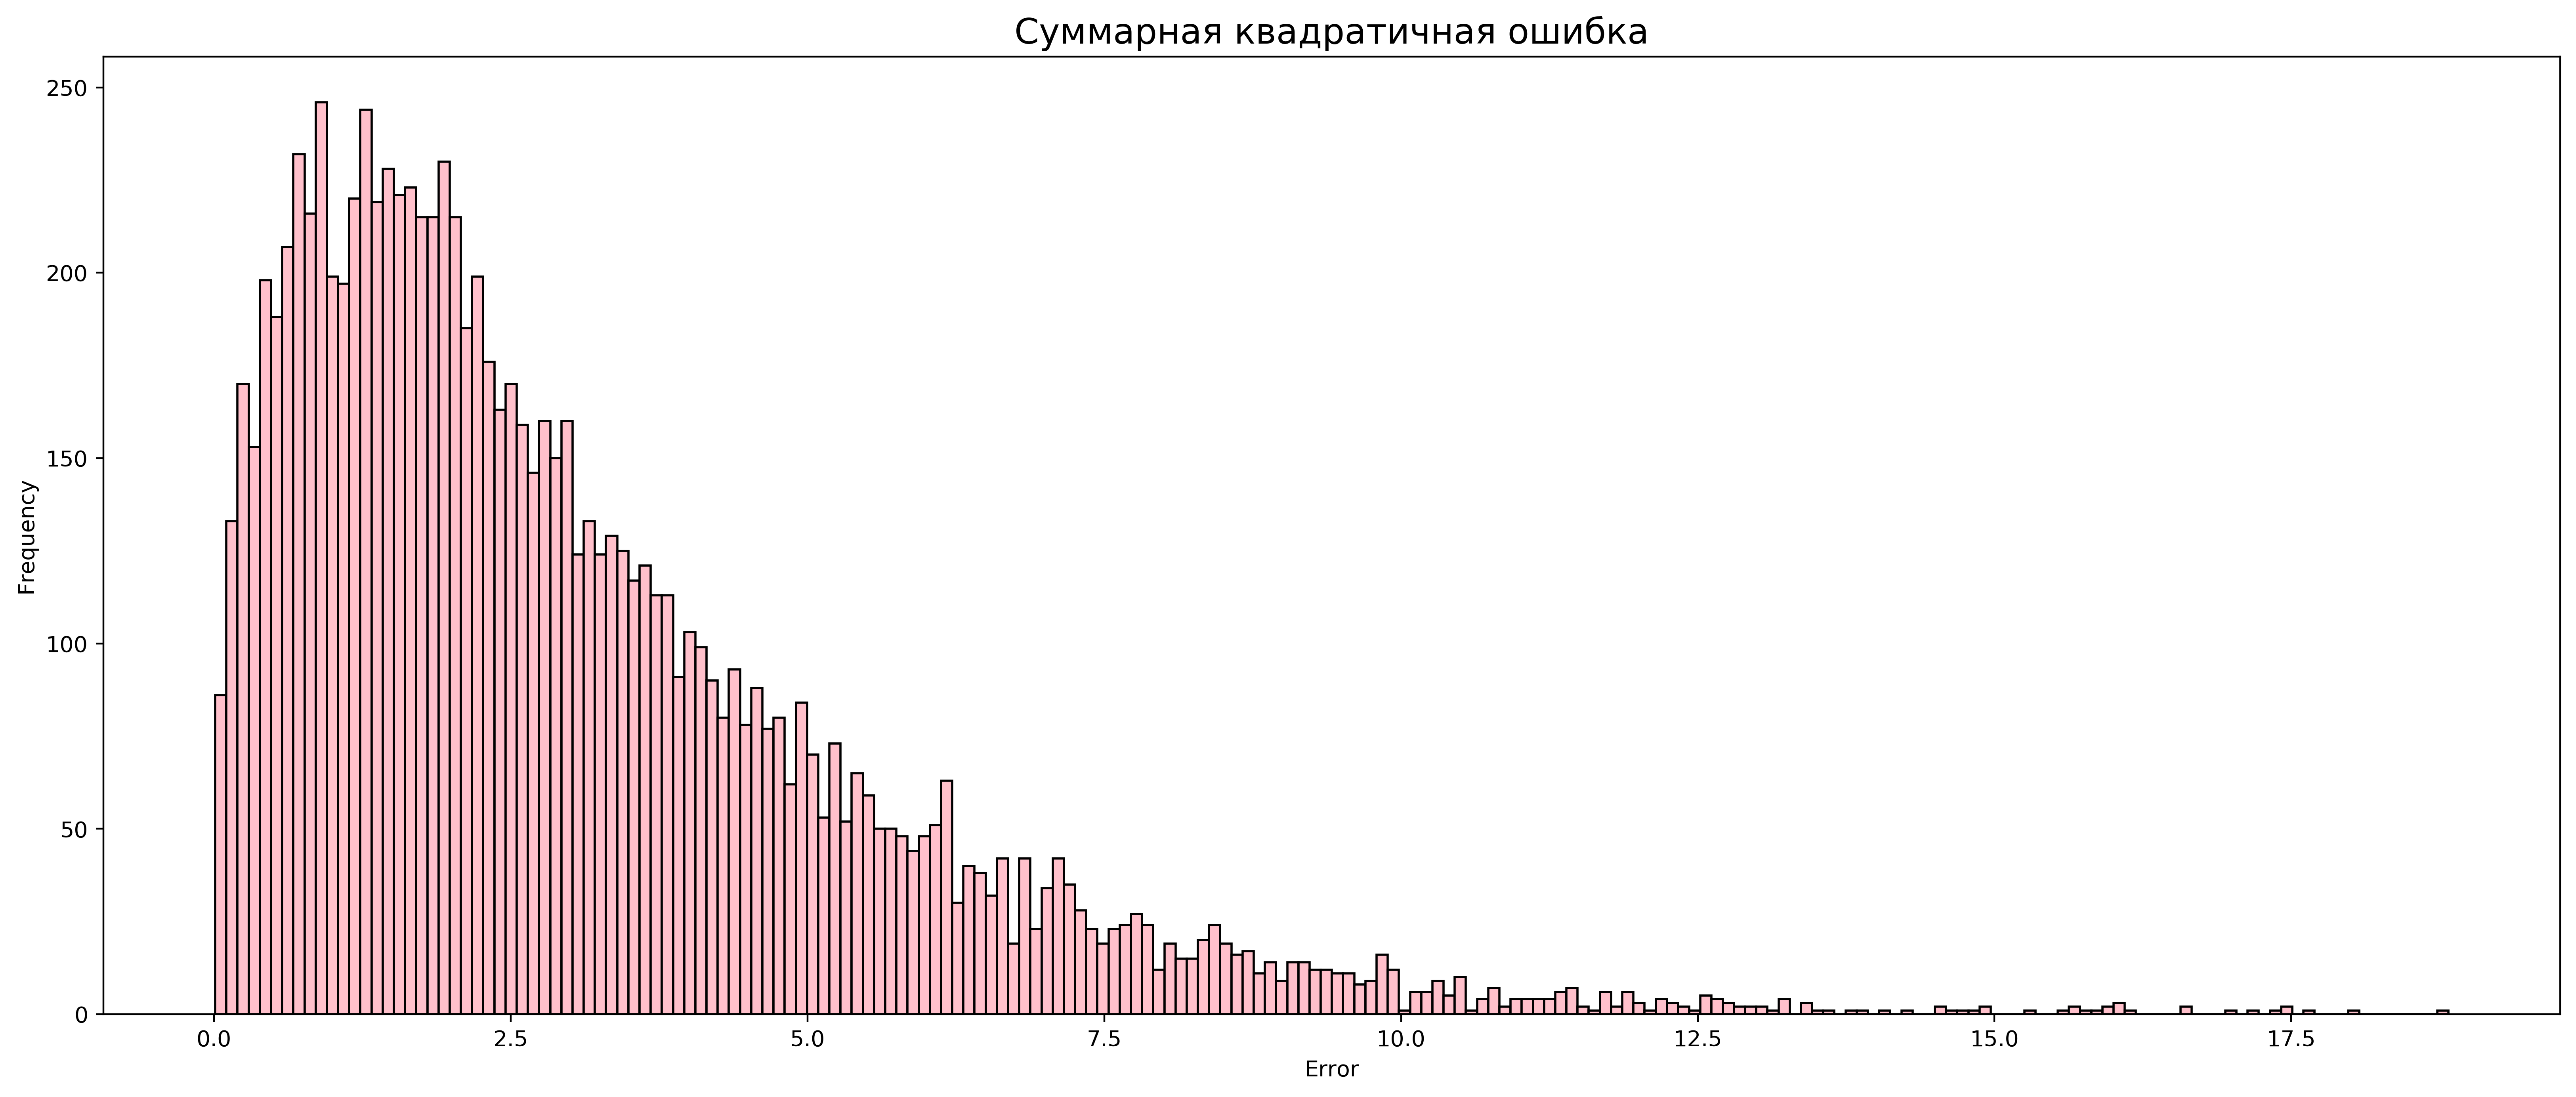

In [773]:
figure(num=None, figsize=(20, 8), dpi=400, facecolor='w', edgecolor='k')
plt.hist(S, rwidth=1, histtype='bar', color='pink', alpha=1, edgecolor='black', bins=200);
plt.xlabel('Error', fontsize=10);
plt.ylabel('Frequency', fontsize=10);
plt.title('Суммарная квадратичная ошибка', fontsize=16);

Найду математическое ожидание

In [775]:
np.mean(S)

3.0228675104026386

### Пункт В

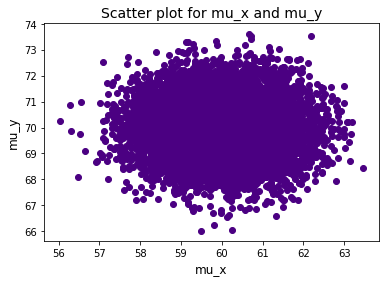

In [701]:
plt.scatter(nif.mean(axis = 1), naf.mean(axis = 1), color='indigo');
plt.xlabel('mu_x', fontsize=12);
plt.ylabel('mu_y', fontsize=12);
plt.title('Scatter plot for mu_x and mu_y', fontsize=14);

Выборочная корреляция

In [700]:
stats.pearsonr(nif.mean(axis = 1), naf.mean(axis = 1))[0]

-0.017694601500021254

### Пункт Г

In [728]:
nif_naf = np.append(nif.mean(axis = 1), naf.mean(axis = 1)).reshape(2, 10 ** 4)

In [730]:
nif_naf_nuf = np.append(nif_naf, nuf.mean(axis = 1)).reshape(3, 10 ** 4)
nif_naf_nuf

array([[60.63453318, 59.20408486, 60.17848882, ..., 60.23662355,
        60.60053229, 59.07523387],
       [69.37010167, 69.74690644, 69.72188132, ..., 68.33143149,
        70.33487672, 70.26420002],
       [80.87387416, 79.74024231, 80.88748093, ..., 81.32310506,
        81.0491132 , 78.85155241]])

In [741]:
fox = (1 - 1 / abs(abs(nif_naf_nuf)) ** 2) * nif_naf_nuf
fox

array([[60.61804093, 59.18719413, 60.16187159, ..., 60.22002235,
        60.58403078, 59.0583063 ],
       [69.35568624, 69.73256889, 69.70753862, ..., 68.31679694,
        70.32065903, 70.24996802],
       [80.86150922, 79.72770159, 80.87511808, ..., 81.31080843,
        81.036775  , 78.83887035]])

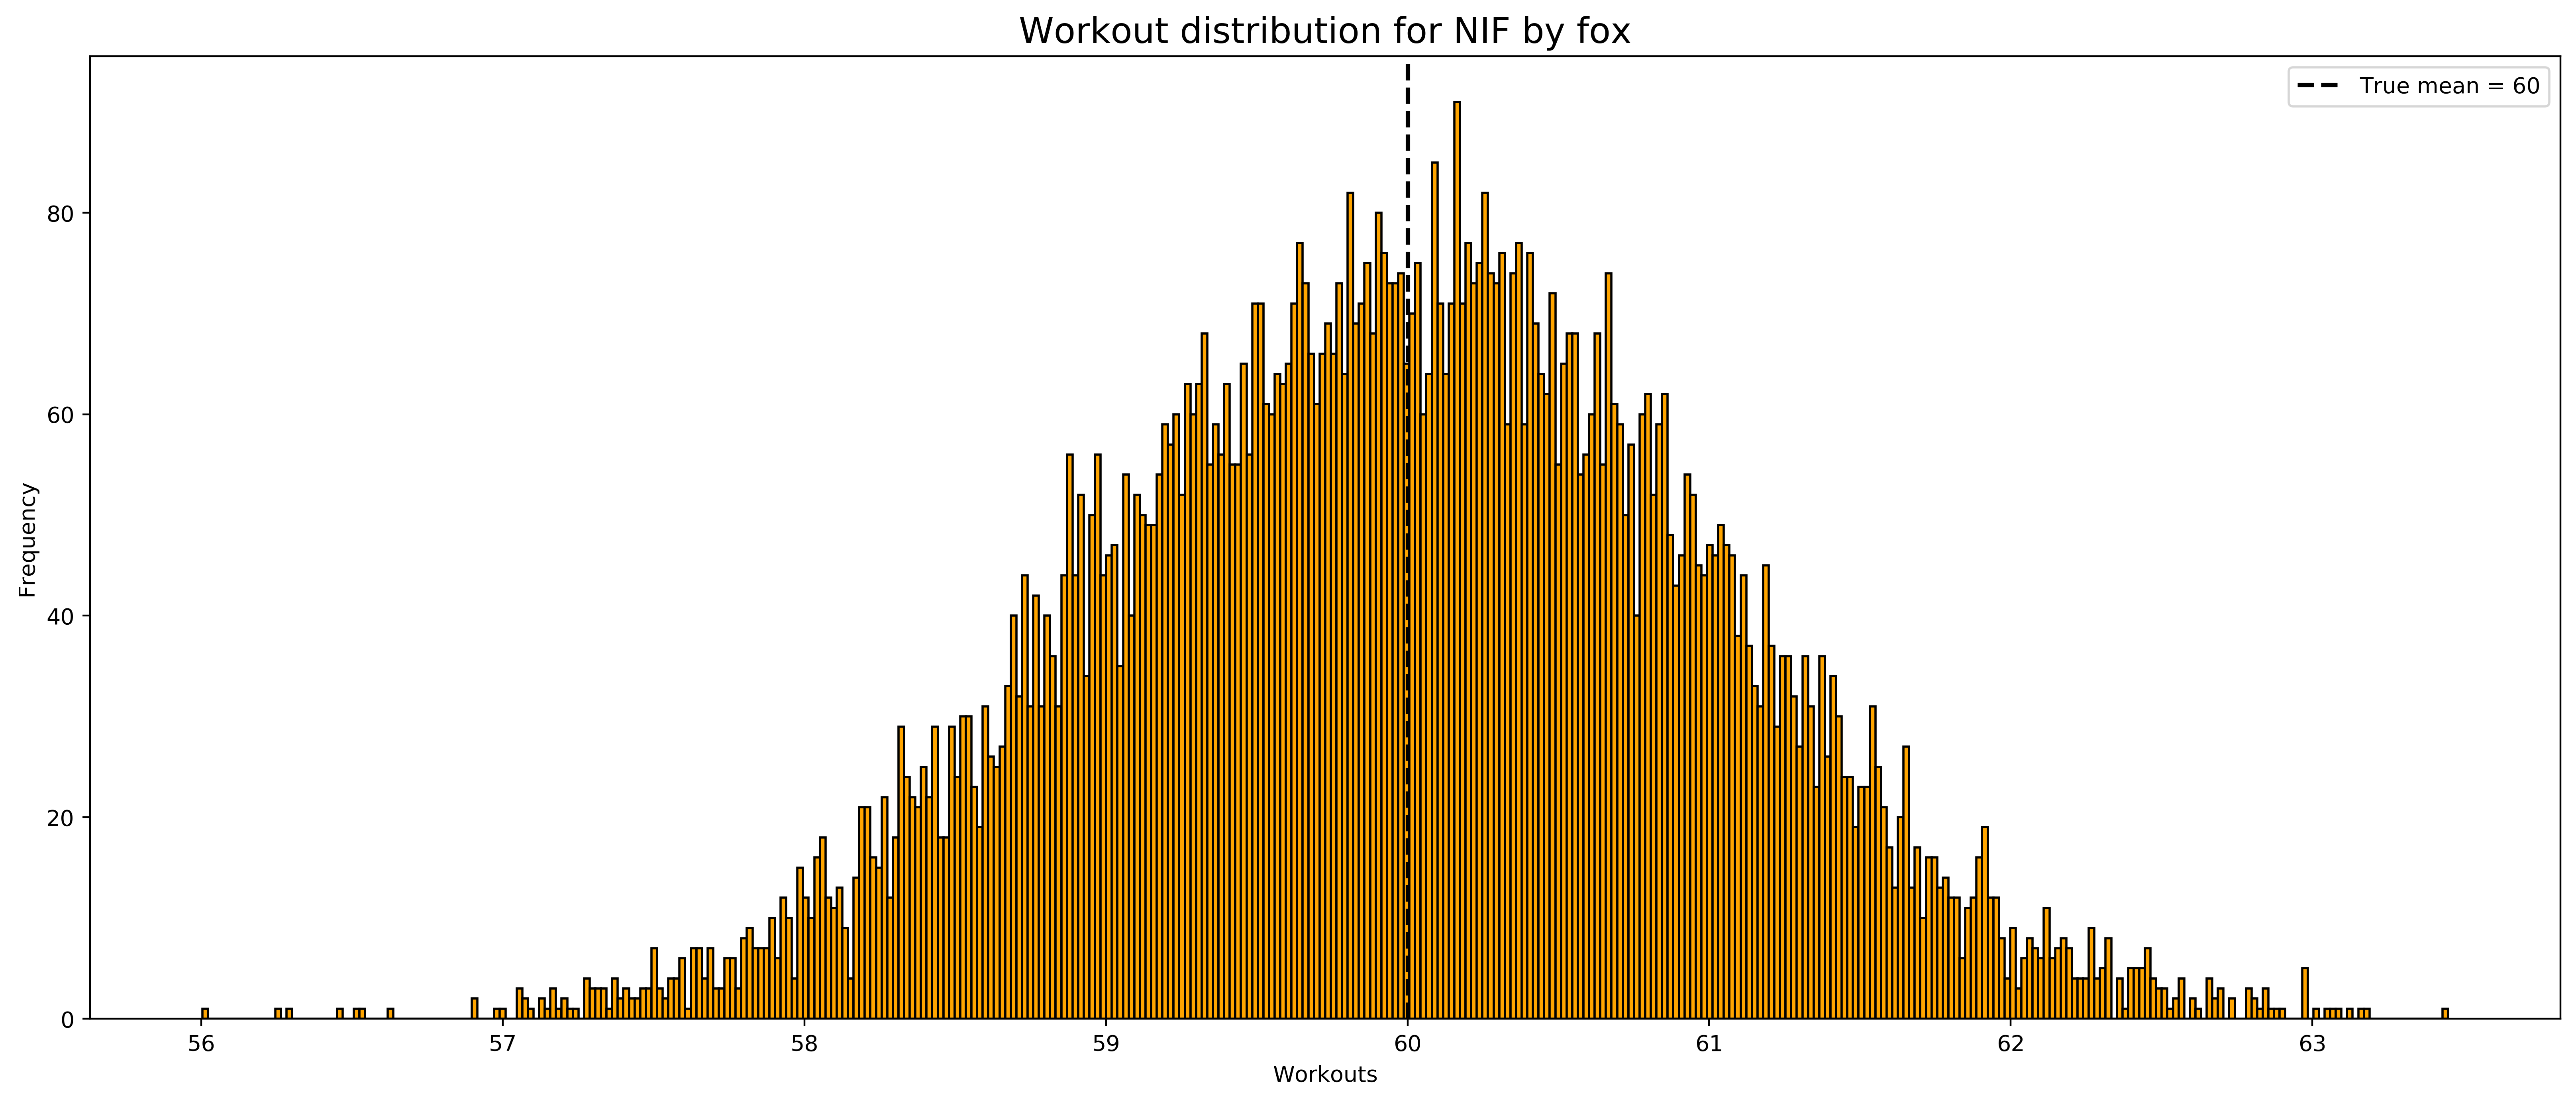

In [743]:
figure(num=None, figsize=(20, 8), dpi=400, facecolor='w', edgecolor='k')
plt.hist(fox[0], rwidth=1, histtype='bar', color='orange', alpha=1, edgecolor='black', bins=400);
plt.xlabel('Workouts', fontsize=10);
plt.ylabel('Frequency', fontsize=10);
plt.title('Workout distribution for NIF by fox', fontsize=16);
plt.axvline(60, color='k', linestyle='dashed', linewidth=2, label='True mean = 60')
plt.legend();

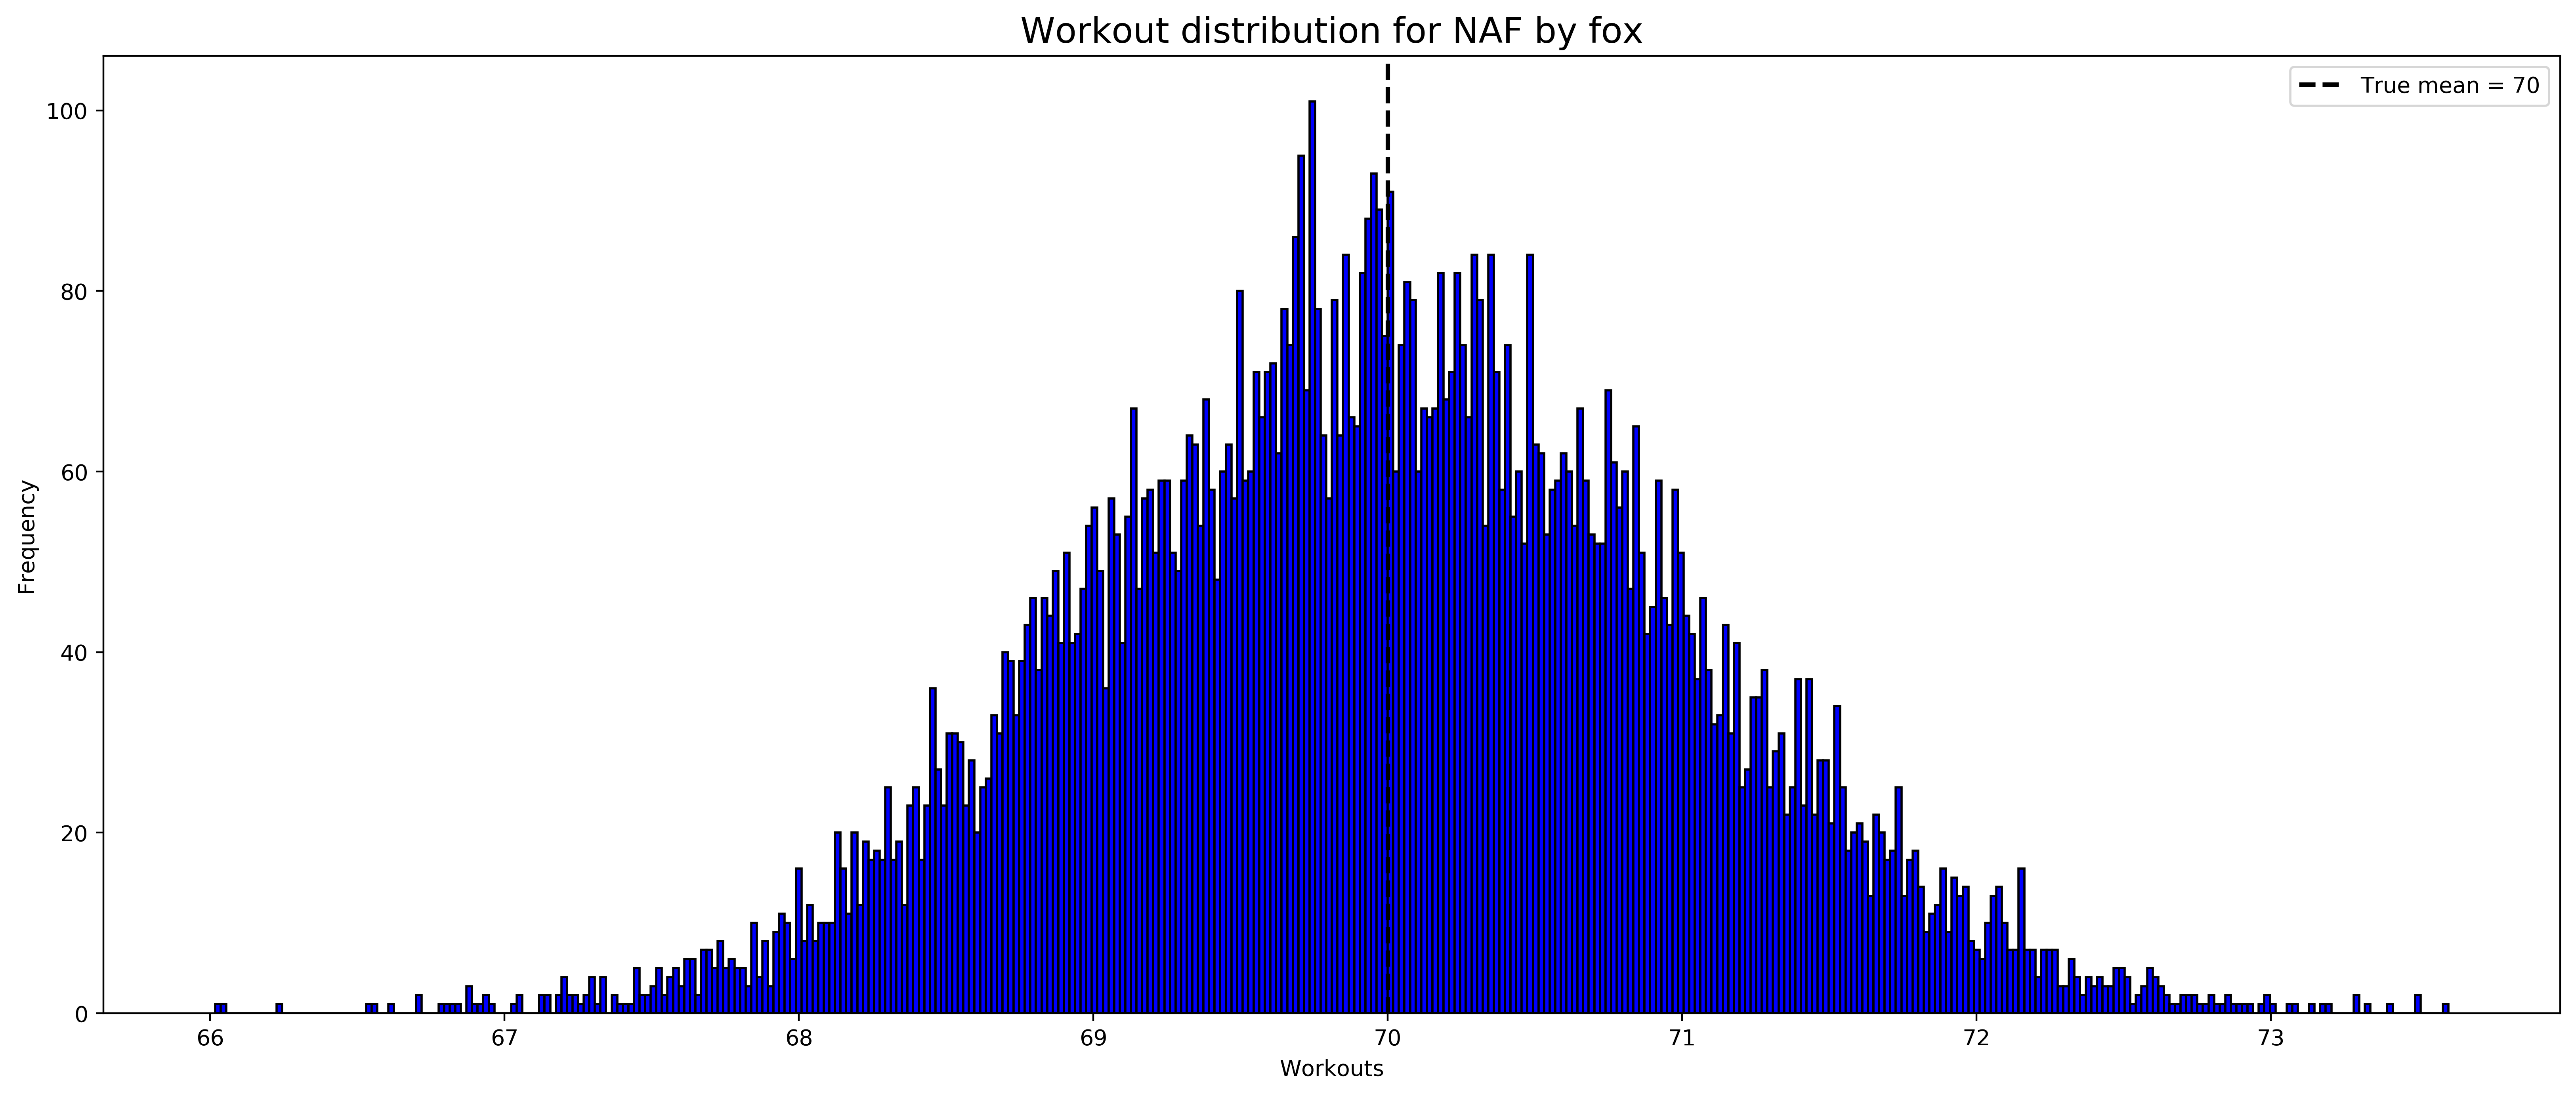

In [746]:
figure(num=None, figsize=(20, 8), dpi=400, facecolor='w', edgecolor='k')
plt.hist(fox[1], rwidth=1, histtype='bar', color='blue', alpha=1, edgecolor='black', bins=400);
plt.xlabel('Workouts', fontsize=10);
plt.ylabel('Frequency', fontsize=10);
plt.title('Workout distribution for NAF by fox', fontsize=16);
plt.axvline(70, color='k', linestyle='dashed', linewidth=2, label='True mean = 70')
plt.legend();

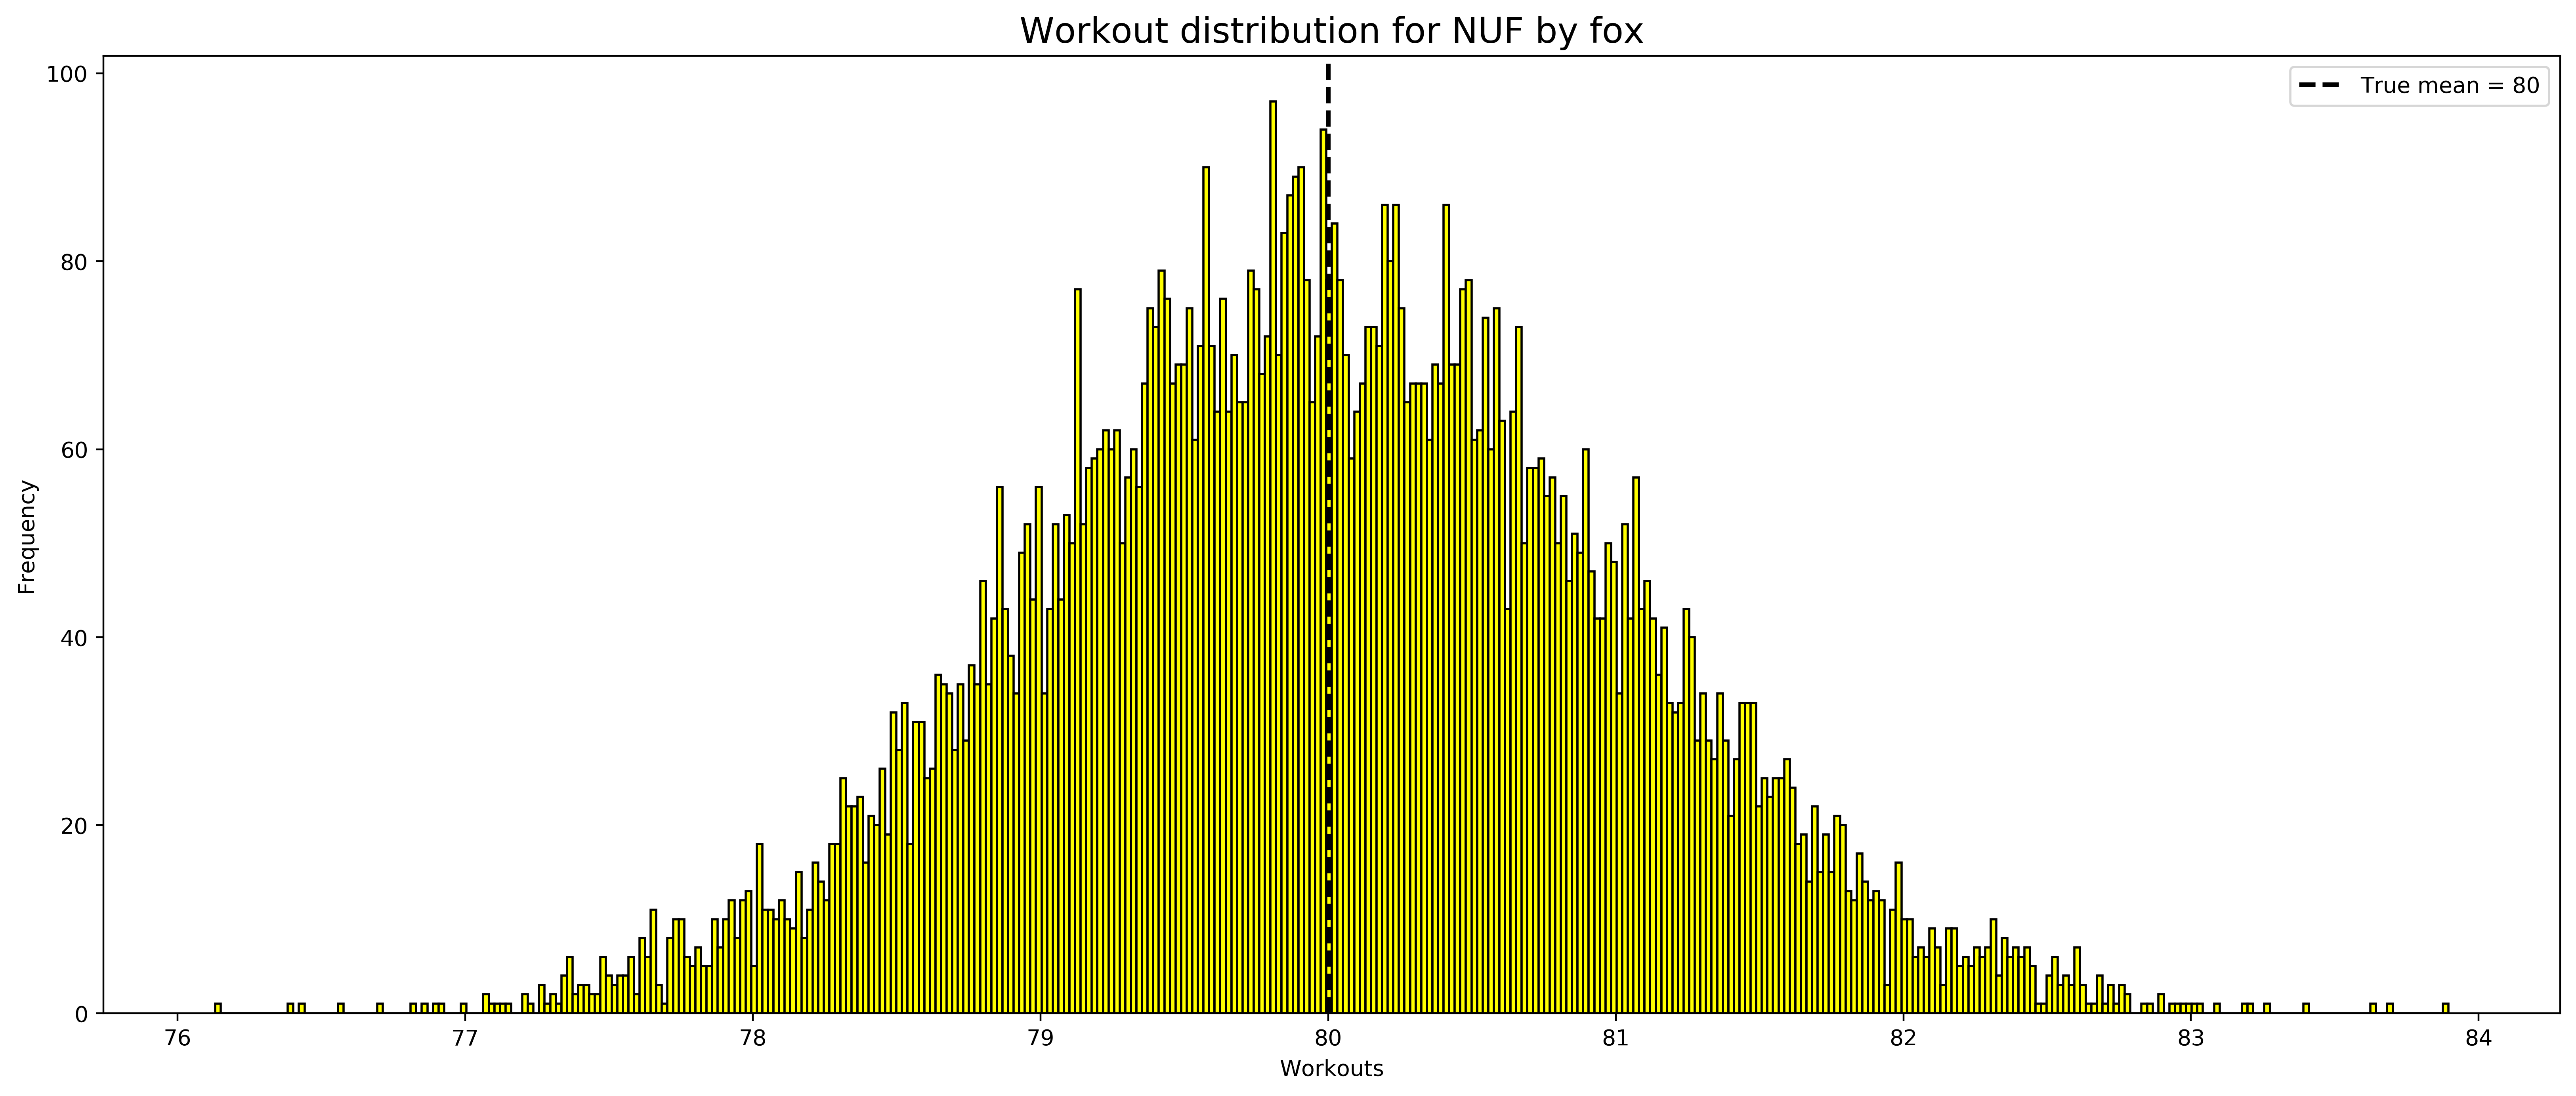

In [748]:
figure(num=None, figsize=(20, 8), dpi=400, facecolor='w', edgecolor='k')
plt.hist(fox[2], rwidth=1, histtype='bar', color='yellow', alpha=1, edgecolor='black', bins=400);
plt.xlabel('Workouts', fontsize=10);
plt.ylabel('Frequency', fontsize=10);
plt.title('Workout distribution for NUF by fox', fontsize=16);
plt.axvline(80, color='k', linestyle='dashed', linewidth=2, label='True mean = 80')
plt.legend();

#### Гистограмма суммарной ошибки

In [762]:
Sfox = (fox[0] - 60) ** 2 + (fox[1] - 70) ** 2 + (fox[2] - 80) ** 2
Sfox

array([1.53931296, 0.80631921, 0.87756773, ..., 4.59980112, 1.51881657,
       2.29749309])

In [763]:
np.mean(Sfox)

3.002652097304513

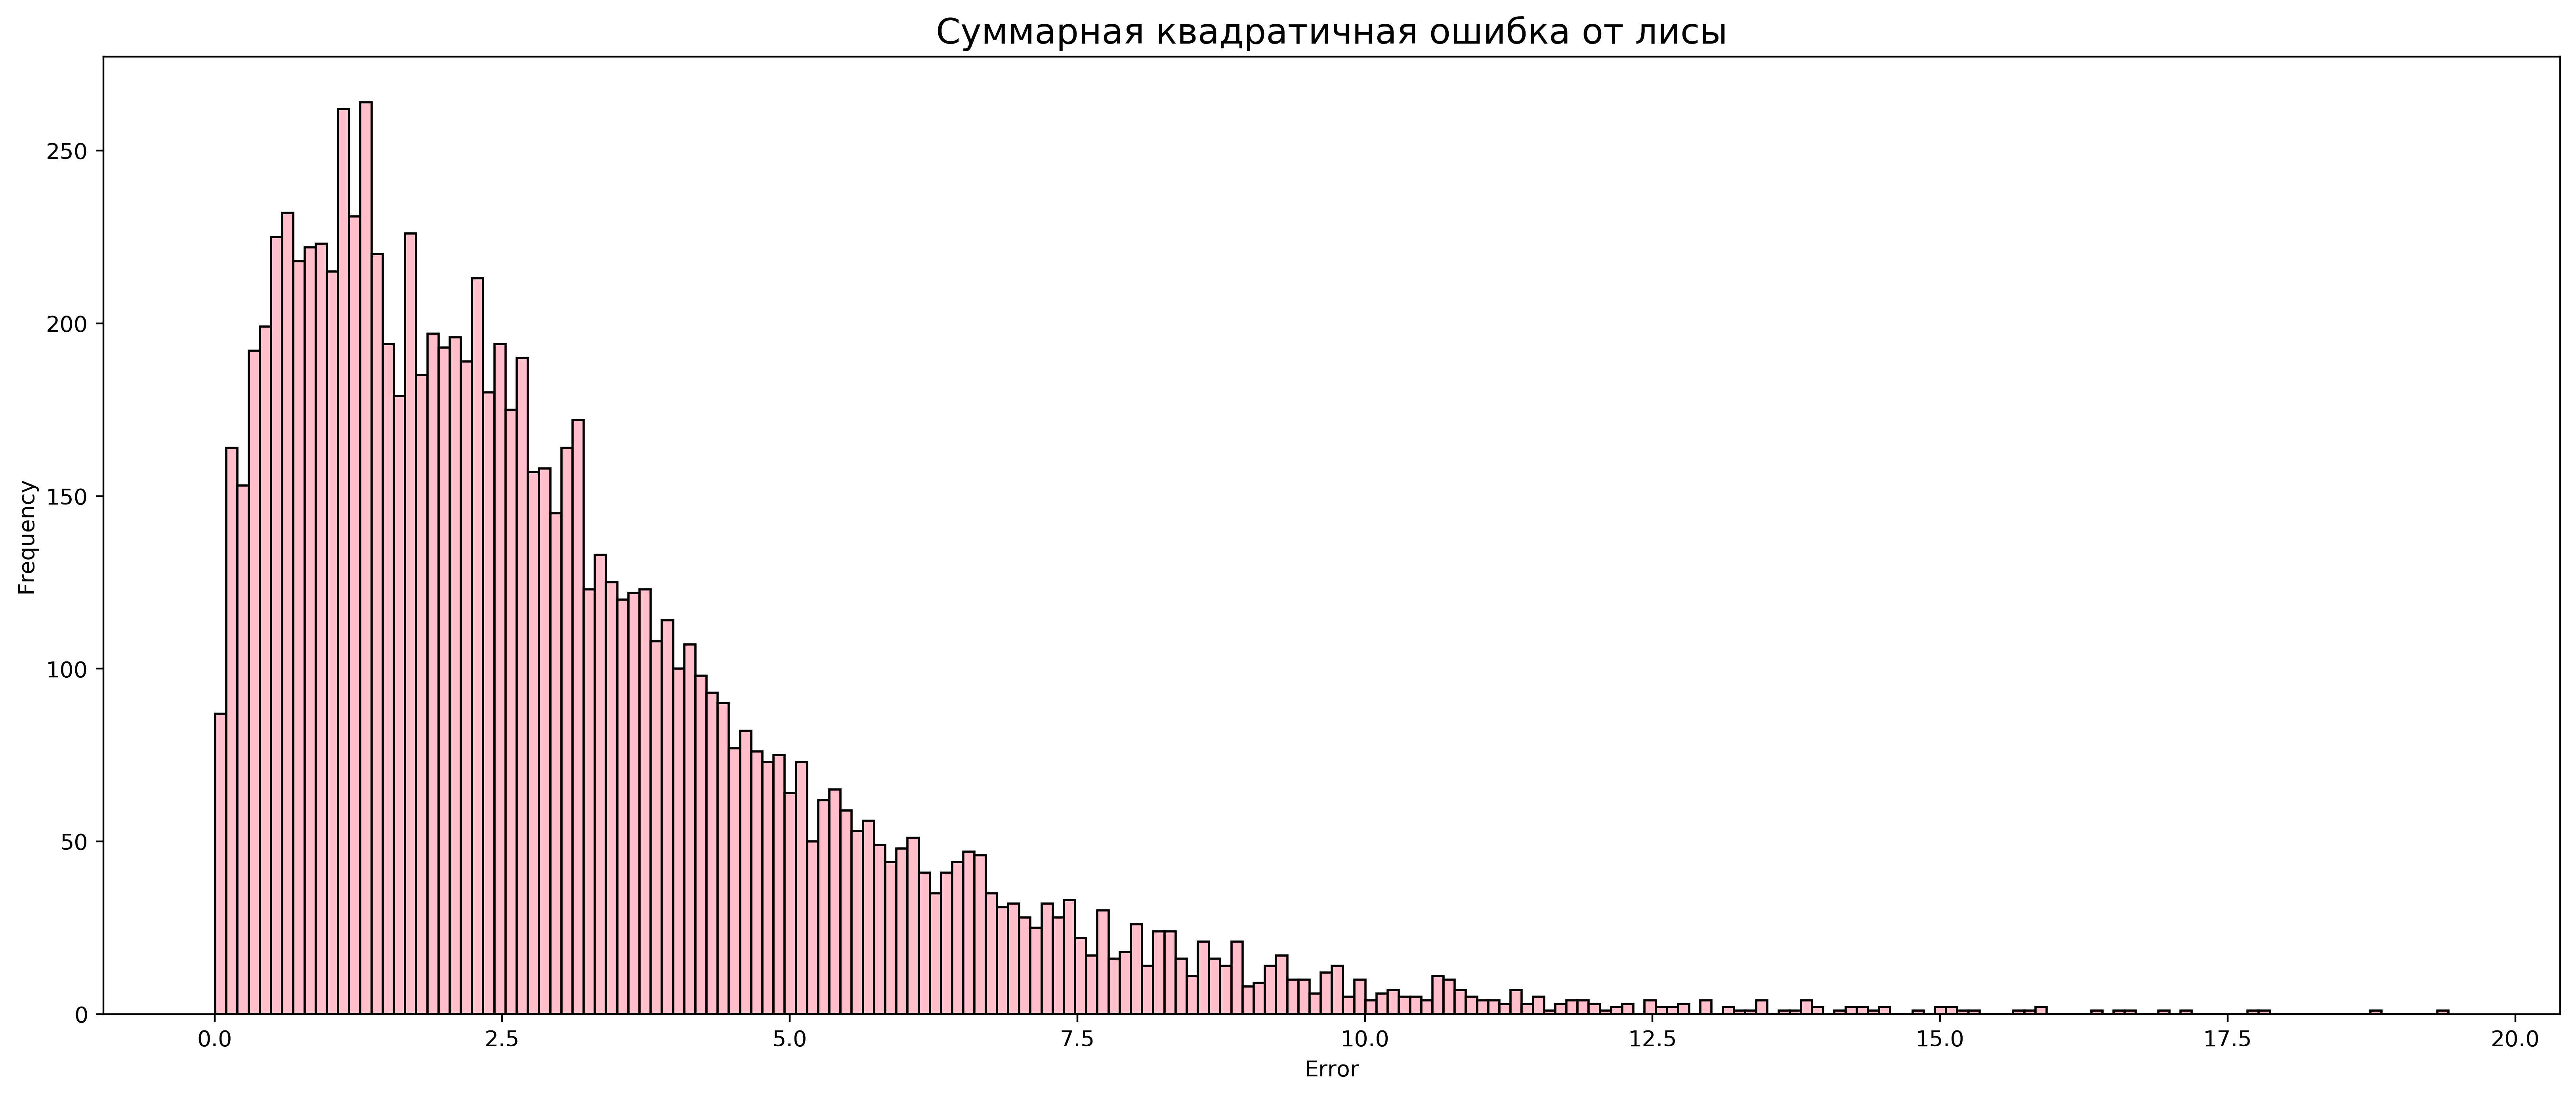

In [764]:
figure(num=None, figsize=(20, 8), dpi=400, facecolor='w', edgecolor='k')
plt.hist(Sfox, rwidth=1, histtype='bar', color='pink', alpha=1, edgecolor='black', bins=200);
plt.xlabel('Error', fontsize=10);
plt.ylabel('Frequency', fontsize=10);
plt.title('Суммарная квадратичная ошибка от лисы', fontsize=16);

#### Диаграмма рассеяния

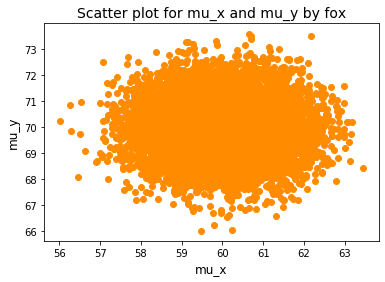

In [754]:
plt.scatter(fox[0], fox[1], color='darkorange');
plt.xlabel('mu_x', fontsize=12);
plt.ylabel('mu_y', fontsize=12);
plt.title('Scatter plot for mu_x and mu_y by fox', fontsize=14);

In [755]:
stats.pearsonr(fox[0], fox[1])[0]

-0.01769460688982257

### Пункт Д

In [779]:
fox[0].mean()

59.97989047020491

In [780]:
nif.mean(axis = 1).mean()

59.993985239135384

In [781]:
60 - nif.mean(axis = 1).mean() < 60 - fox[0].mean()

True

Получается, что Лиса оценивает Ниф-Нифа хуже

In [776]:
S.mean()

3.0228675104026386

In [769]:
Sfox.mean()

3.002652097304513

In [777]:
Sfox.mean() < S.mean()

True

Лиса оценивает вектор накачанности точнее